<a href="https://colab.research.google.com/github/hansika457/DAI-101-Assignment/blob/main/DAI_101_Assignment_Hansika_Soni_22113054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Objective:
Perform an explorative analysis of a dataset of your choice from the Kaggle library
(https://www.kaggle.com/datasets). The analysis should be a mix of calculating relevant statistical measures, plotting, and drawing applicable conclusions using both numerical and categorical variables.
The analysis should be performed in two steps:
	•	Univariate analysis
	•	Multivariate analysis

Here is all the data you need:
"AccidentsBig.csv"

## Data loading

### Subtask:
Load the "AccidentsBig.csv" dataset into a pandas DataFrame.


**Reasoning**:
I need to load the dataset into a pandas DataFrame and then display the first 5 rows and the shape of the DataFrame to verify that the data has been loaded correctly, as per the instructions.



In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("AccidentsBig.csv")

# Print the first 5 rows of the DataFrame
display(df.head())

# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

<ipython-input-1-b6d23443e2d9>:4: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AccidentsBig.csv")


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


Shape of the DataFrame: (1048575, 30)


## Data cleaning

### Subtask:
Clean the loaded dataset `df`.


**Reasoning**:
The current subtask is to clean the dataset. The first step is to identify the columns with missing values and decide on a strategy for handling them. This involves calculating the number of missing values in each column and determining the percentage of missing values. Then, we can deal with the mixed data type columns.



In [2]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:\n", missing_percentage)

# Handling mixed data types columns
for col in [
    "Local_Authority_(Highway)",
    "1st_Road_Class",
    "2nd_Road_Class",
    "LSOA_of_Accident_Location",
]:
    df[col] = df[col].astype(str)
    print(f"Column '{col}' has been converted to string type")


Missing Values per Column:
 Accident_Index                                 988577
longitude                                      988577
latitude                                       988577
Police_Force                                   988577
Accident_Severity                              988577
Number_of_Vehicles                             988577
Number_of_Casualties                           988577
Day_of_Week                                    988577
Time                                           988578
Local_Authority_(District)                     988577
Local_Authority_(Highway)                      988577
1st_Road_Class                                 988577
1st_Road_Number                                988577
Road_Type                                      988577
Speed_limit                                    988577
Junction_Detail                                988577
Junction_Control                               988577
2nd_Road_Class                                 988577


**Reasoning**:
From the previous output, we can see that almost all columns have more than 94% missing values. According to the instructions, for columns with a significant number of missing values (more than 50%), it might be appropriate to drop the entire column. So, we will drop all these columns. Then, we can remove duplicate rows and identify outliers.



In [3]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
df.drop(columns=columns_to_drop, inplace=True)

# Remove duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicate_rows}")
df.drop_duplicates(inplace=True)
print(f"Shape of the DataFrame after dropping duplicates: {df.shape}")

# Print the updated shape of the DataFrame
print(f"Shape of the DataFrame after dropping columns: {df.shape}")

Number of duplicate rows before dropping: 0
Shape of the DataFrame after dropping duplicates: (1048575, 0)
Shape of the DataFrame after dropping columns: (1048575, 0)


## Data cleaning

### Subtask:
Re-evaluate and clean the loaded dataset `df`, considering the previous failure.


**Reasoning**:
The previous cleaning process resulted in an empty DataFrame because all columns had more than 50% missing values. The current subtask is to re-evaluate and clean the dataset with a new threshold of 95% and perform other cleaning operations. Since the dataframe is empty, I need to reload the data first, then follow the steps in the instructions.



In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame again
df = pd.read_csv("AccidentsBig.csv")

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:\n", missing_percentage)

# Drop columns with more than 95% missing values
columns_to_drop = missing_percentage[missing_percentage > 95].index
df.drop(columns=columns_to_drop, inplace=True)
print(f"Shape of the DataFrame after dropping columns: {df.shape}")

# Impute missing numerical values with the median
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)
print(f"Shape of the DataFrame after dropping rows: {df.shape}")

# Remove duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicate_rows}")
df.drop_duplicates(inplace=True)
print(f"Shape of the DataFrame after dropping duplicates: {df.shape}")

# Handle mixed data types columns
for col in [
    "Local_Authority_(Highway)",
    "1st_Road_Class",
    "2nd_Road_Class",
    "LSOA_of_Accident_Location",
]:
    df[col] = df[col].astype(str)
    print(f"Column '{col}' has been converted to string type")

# Assess the outcome
print("\nShape of the DataFrame after cleaning:", df.shape)
print("\nMissing values per column after cleaning:\n", df.isnull().sum())
print("\nData types of each column after cleaning:\n", df.dtypes)

<ipython-input-4-aee3e20ee8bd>:4: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AccidentsBig.csv")


Missing Values per Column:
 Accident_Index                                 988577
longitude                                      988577
latitude                                       988577
Police_Force                                   988577
Accident_Severity                              988577
Number_of_Vehicles                             988577
Number_of_Casualties                           988577
Day_of_Week                                    988577
Time                                           988578
Local_Authority_(District)                     988577
Local_Authority_(Highway)                      988577
1st_Road_Class                                 988577
1st_Road_Number                                988577
Road_Type                                      988577
Speed_limit                                    988577
Junction_Detail                                988577
Junction_Control                               988577
2nd_Road_Class                                 988577


<ipython-input-4-aee3e20ee8bd>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Shape of the DataFrame after dropping rows: (59900, 30)
Number of duplicate rows before dropping: 0
Shape of the DataFrame after dropping duplicates: (59900, 30)
Column 'Local_Authority_(Highway)' has been converted to string type
Column '1st_Road_Class' has been converted to string type
Column '2nd_Road_Class' has been converted to string type
Column 'LSOA_of_Accident_Location' has been converted to string type

Shape of the DataFrame after cleaning: (59900, 30)

Missing values per column after cleaning:
 Accident_Index                                 0
longitude                                      0
latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     

## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify numerical and categorical variables, and get a sense of the data distribution.


**Reasoning**:
The current subtask is to explore the dataset, which involves displaying the first few rows, checking the shape, getting a summary with `.info()`, descriptive statistics with `.describe()`, unique values with `.nunique()`, the data type and name of each column. Since these steps are all about exploring the dataset, I will perform all these steps in a single code block.



In [5]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
display(df.head())

# Print the shape of the DataFrame
print("\nShape of the DataFrame:", df.shape)

# Print the summary of the DataFrame
print("\nSummary of the DataFrame:")
df.info()

# Print descriptive statistics for the numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Print descriptive statistics for all columns
print("\nDescriptive statistics for all columns:")
display(df.describe(include='all'))

# Check the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df.nunique())

# Print the data type for each column
print("\nData type for each column:")
print(df.dtypes)

# Print all the columns' name
print("\nAll the columns' name:")
print(df.columns.values)

First few rows of the DataFrame:


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018



Shape of the DataFrame: (59900, 30)

Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 59900 entries, 0 to 59997
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59900 non-null  float64
 1   longitude                                    59900 non-null  float64
 2   latitude                                     59900 non-null  float64
 3   Police_Force                                 59900 non-null  float64
 4   Accident_Severity                            59900 non-null  float64
 5   Number_of_Vehicles                           59900 non-null  float64
 6   Number_of_Casualties                         59900 non-null  float64
 7   Day_of_Week                                  59900 non-null  float64
 8   Time                                         59900 non-null  object 
 9   Local_Authori

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Number,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,...,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000
mean,30004.308314,78.098733,22.084520,4.297245,2.855526,1.831569,1.320568,4.124491,71.073506,902.467262,...,331.455058,0.006194,0.857145,1.902137,1.386578,1.298531,0.089182,0.047947,1.184441,1.198664
std,17317.652241,5.950988,5.656043,4.536031,0.380972,0.692485,0.761786,1.923835,63.519727,1756.579846,...,1186.456185,0.102450,1.896989,1.486447,1.267285,0.542085,0.644199,0.480861,0.387846,0.439724
min,1.000000,69.015103,8.864429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,15005.750000,73.895764,18.555545,1.000000,3.000000,1.000000,1.000000,3.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,30009.500000,77.050659,22.732970,4.000000,3.000000,2.000000,1.000000,4.000000,73.000000,110.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,44998.250000,78.544158,27.091603,6.000000,3.000000,2.000000,1.000000,6.000000,107.000000,583.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,59998.000000,94.231931,31.068800,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,9999.000000,...,9711.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000



Descriptive statistics for all columns:


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
count,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900,59900.000000,...,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900.000000,59900,59900
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9827,365
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E01000004,04-11-2018
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,569,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270,241
mean,30004.308314,78.098733,22.084520,4.297245,2.855526,1.831569,1.320568,4.124491,NaN,71.073506,...,0.857145,1.902137,1.386578,1.298531,0.089182,0.047947,1.184441,1.198664,NaN,NaN
std,17317.652241,5.950988,5.656043,4.536031,0.380972,0.692485,0.761786,1.923835,NaN,63.519727,...,1.896989,1.486447,1.267285,0.542085,0.644199,0.480861,0.387846,0.439724,NaN,NaN
min,1.000000,69.015103,8.864429,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,NaN,NaN
25%,15005.750000,73.895764,18.555545,1.000000,3.000000,1.000000,1.000000,3.000000,NaN,18.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
50%,30009.500000,77.050659,22.732970,4.000000,3.000000,2.000000,1.000000,4.000000,NaN,73.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
75%,44998.250000,78.544158,27.091603,6.000000,3.000000,2.000000,1.000000,6.000000,NaN,107.000000,...,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN



Number of unique values in each column:
Accident_Index                                 59900
longitude                                      59887
latitude                                       59886
Police_Force                                      10
Accident_Severity                                  3
Number_of_Vehicles                                13
Number_of_Casualties                              15
Day_of_Week                                        7
Time                                            1433
Local_Authority_(District)                       104
Local_Authority_(Highway)                         67
1st_Road_Class                                     6
1st_Road_Number                                 1531
Road_Type                                          6
Speed_limit                                        7
Junction_Detail                                   10
Junction_Control                                   6
2nd_Road_Class                                     7
2nd_R

## Data wrangling

### Subtask:
Transform the raw data in `df` to prepare it for analysis.


**Reasoning**:
The next step is to transform the raw data in `df` to prepare it for analysis, according to the instructions. This involves converting 'Date' and 'Time' columns to datetime objects, extracting 'Year', 'Month', 'Day', 'Hour', and 'Minute', dropping the original 'Date' and 'Time' columns, and handling categorical and numerical columns by converting them to the correct data types. All these steps can be grouped into one code block.



In [6]:
import pandas as pd

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract 'Year', 'Month', and 'Day'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Convert 'Time' column to datetime objects
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Extract 'Hour' and 'Minute'
df['Hour'] = [time.hour for time in df['Time']]
df['Minute'] = [time.minute for time in df['Time']]

# Drop 'Date' and 'Time'
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Handle categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Handle numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col] = df[col].astype('float32')

display(df.head())
print(df.info())

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Day,Hour,Minute
0,1.0,78.610390,14.724026,1.0,2.0,1.0,1.0,3.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002849,2018.0,1.0,4.0,17.0,42.0
1,2.0,78.534042,14.762354,1.0,3.0,1.0,1.0,4.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002909,2018.0,1.0,5.0,17.0,36.0
2,3.0,78.470879,14.745606,1.0,3.0,2.0,1.0,5.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002857,2018.0,1.0,6.0,0.0,15.0
3,4.0,78.557991,14.667128,1.0,3.0,1.0,1.0,6.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002840,2018.0,1.0,7.0,10.0,35.0
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002863,2018.0,1.0,10.0,21.0,13.0


<class 'pandas.core.frame.DataFrame'>
Index: 59900 entries, 0 to 59997
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Accident_Index                               59900 non-null  float32 
 1   longitude                                    59900 non-null  float32 
 2   latitude                                     59900 non-null  float32 
 3   Police_Force                                 59900 non-null  float32 
 4   Accident_Severity                            59900 non-null  float32 
 5   Number_of_Vehicles                           59900 non-null  float32 
 6   Number_of_Casualties                         59900 non-null  float32 
 7   Day_of_Week                                  59900 non-null  float32 
 8   Local_Authority_(District)                   59900 non-null  float32 
 9   Local_Authority_(Highway)                    59900 non-null  categ

## Data preparation

### Subtask:
Prepare the data for univariate and multivariate analysis.


**Reasoning**:
The current subtask is to prepare the data for univariate and multivariate analysis. This involves creating a copy of the DataFrame, and then performing a few operations to check the dataframe. Based on the instructions, we need to create a copy of the current DataFrame `df` and name it `df_prepared`. Then, print the shape of `df_prepared`, the first 5 rows of `df_prepared`, the info of `df_prepared` and the unique values of the column `Accident_Severity` in `df_prepared`. All of these can be done in one code block.



In [7]:
# Create a copy of the DataFrame
df_prepared = df.copy()

# Print the shape of the prepared DataFrame
print(f"Shape of the prepared DataFrame: {df_prepared.shape}")

# Print the first 5 rows of the prepared DataFrame
print("\nFirst 5 rows of the prepared DataFrame:")
display(df_prepared.head())

# Print the info of the prepared DataFrame
print("\nInfo of the prepared DataFrame:")
df_prepared.info()

# Print the unique values of the column 'Accident_Severity'
print("\nUnique values of the 'Accident_Severity' column:")
print(df_prepared['Accident_Severity'].unique())

Shape of the prepared DataFrame: (59900, 33)

First 5 rows of the prepared DataFrame:


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Month,Day,Hour,Minute
0,1.0,78.610390,14.724026,1.0,2.0,1.0,1.0,3.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002849,2018.0,1.0,4.0,17.0,42.0
1,2.0,78.534042,14.762354,1.0,3.0,1.0,1.0,4.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002909,2018.0,1.0,5.0,17.0,36.0
2,3.0,78.470879,14.745606,1.0,3.0,2.0,1.0,5.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002857,2018.0,1.0,6.0,0.0,15.0
3,4.0,78.557991,14.667128,1.0,3.0,1.0,1.0,6.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002840,2018.0,1.0,7.0,10.0,35.0
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,12.0,E09000020,...,0.0,0.0,1.0,1.0,E01002863,2018.0,1.0,10.0,21.0,13.0



Info of the prepared DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 59900 entries, 0 to 59997
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Accident_Index                               59900 non-null  float32 
 1   longitude                                    59900 non-null  float32 
 2   latitude                                     59900 non-null  float32 
 3   Police_Force                                 59900 non-null  float32 
 4   Accident_Severity                            59900 non-null  float32 
 5   Number_of_Vehicles                           59900 non-null  float32 
 6   Number_of_Casualties                         59900 non-null  float32 
 7   Day_of_Week                                  59900 non-null  float32 
 8   Local_Authority_(District)                   59900 non-null  float32 
 9   Local_Authority_(Highway)        

## Data analysis

### Subtask:
Perform univariate analysis on the prepared data (`df_prepared`).


**Reasoning**:
The current subtask is to perform univariate analysis on the prepared data (`df_prepared`). This involves calculating descriptive statistics for numerical columns (mean, median, standard deviation, minimum, maximum) and frequency counts for categorical columns. I will perform all these steps in one code block.



In [8]:
# Separate numerical and categorical columns
numerical_cols = df_prepared.select_dtypes(include=['number']).columns
categorical_cols = df_prepared.select_dtypes(include=['category']).columns

# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(f"  Mean: {df_prepared[col].mean():.2f}")
    print(f"  Median: {df_prepared[col].median():.2f}")
    print(f"  Standard Deviation: {df_prepared[col].std():.2f}")
    print(f"  Minimum: {df_prepared[col].min():.2f}")
    print(f"  Maximum: {df_prepared[col].max():.2f}")

# Frequency counts for categorical columns
print("\nFrequency Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df_prepared[col].value_counts())

Descriptive Statistics for Numerical Columns:

Column: Accident_Index
  Mean: 30004.31
  Median: 30009.50
  Standard Deviation: 17317.58
  Minimum: 1.00
  Maximum: 59998.00

Column: longitude
  Mean: 78.10
  Median: 77.05
  Standard Deviation: 5.95
  Minimum: 69.02
  Maximum: 94.23

Column: latitude
  Mean: 22.08
  Median: 22.73
  Standard Deviation: 5.66
  Minimum: 8.86
  Maximum: 31.07

Column: Police_Force
  Mean: 4.30
  Median: 4.00
  Standard Deviation: 4.54
  Minimum: 1.00
  Maximum: 48.00

Column: Accident_Severity
  Mean: 2.86
  Median: 3.00
  Standard Deviation: 0.38
  Minimum: 1.00
  Maximum: 3.00

Column: Number_of_Vehicles
  Mean: 1.83
  Median: 2.00
  Standard Deviation: 0.69
  Minimum: 1.00
  Maximum: 18.00

Column: Number_of_Casualties
  Mean: 1.32
  Median: 1.00
  Standard Deviation: 0.76
  Minimum: 1.00
  Maximum: 23.00

Column: Day_of_Week
  Mean: 4.12
  Median: 4.00
  Standard Deviation: 1.92
  Minimum: 1.00
  Maximum: 7.00

Column: Local_Authority_(District)
  Mean:

## Data visualization

### Subtask:
Visualize the results of the univariate analysis on the `df_prepared` DataFrame.


**Reasoning**:
The current subtask is to visualize the results of the univariate analysis on the `df_prepared` DataFrame. This involves creating histograms and box plots for each numerical column, and bar charts for each categorical column. The instructions indicate that these plots can be created in separate figures and that x and y labels should be added to each plot, so I will do that. I will also group all the plotting code into one code block.



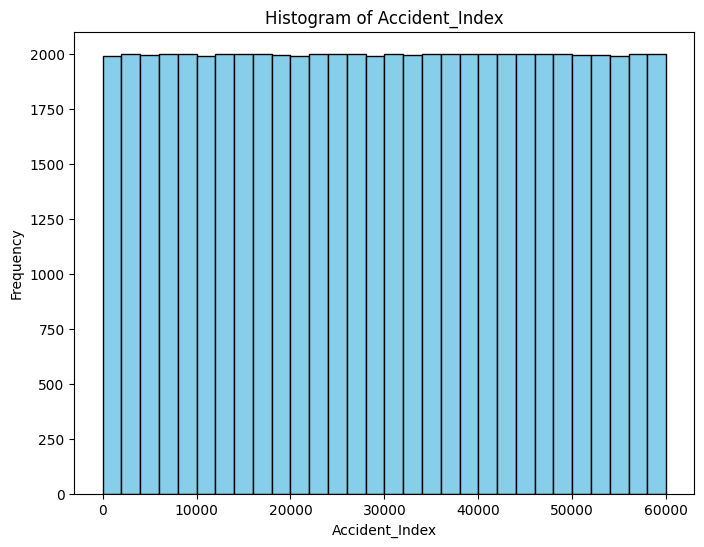

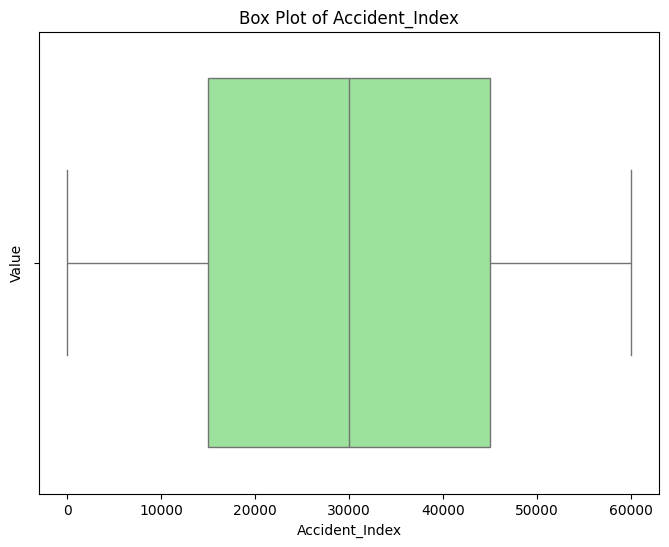

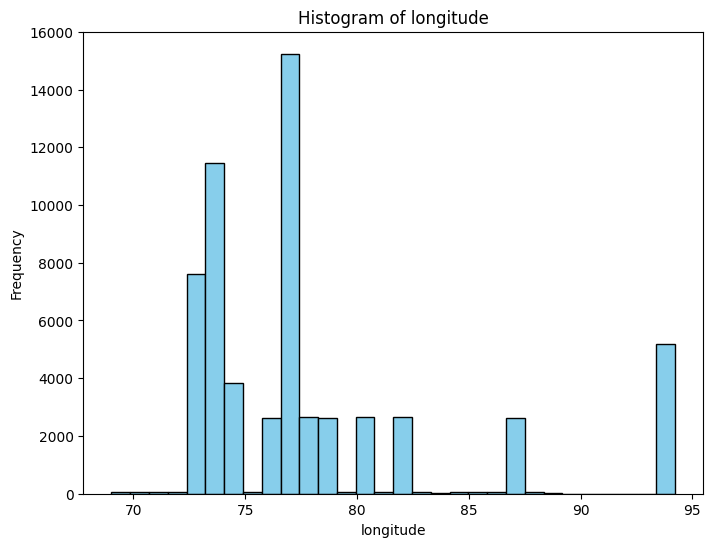

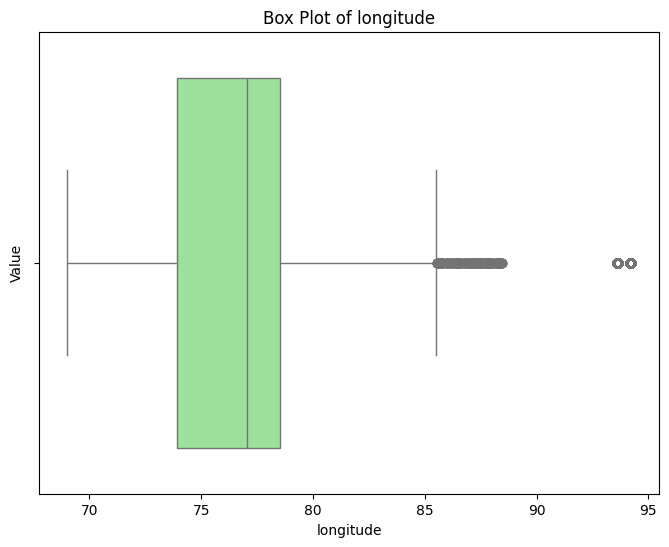

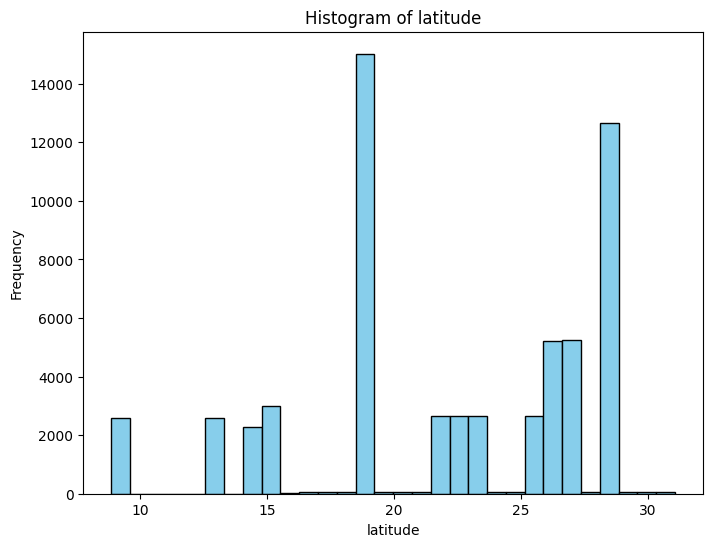

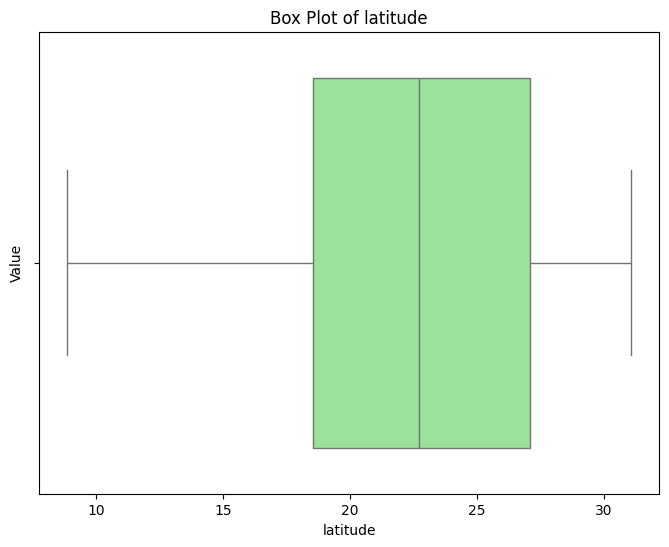

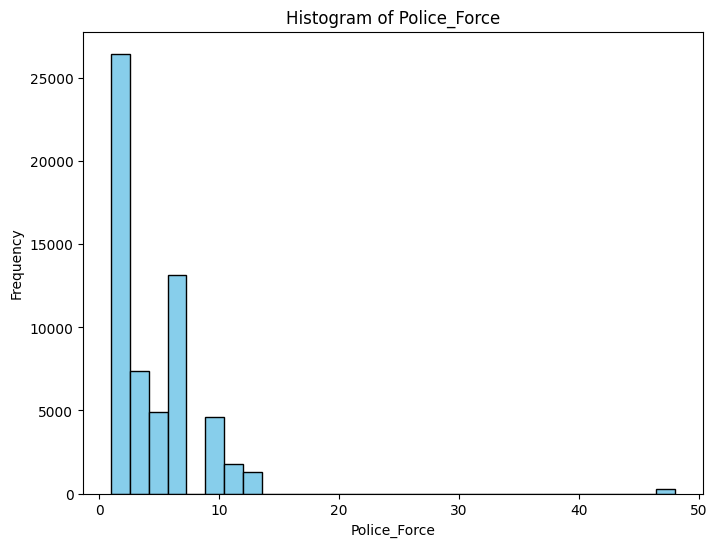

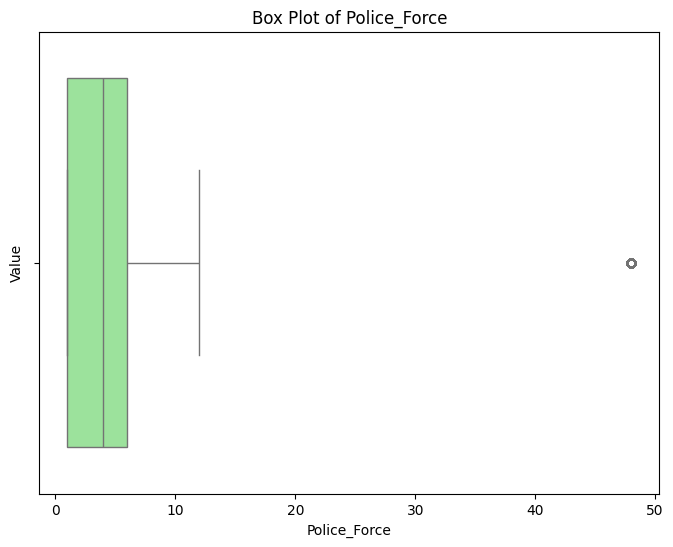

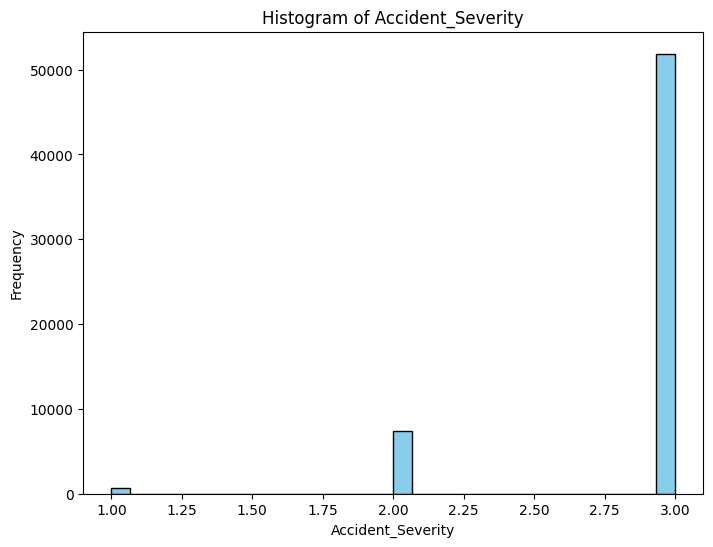

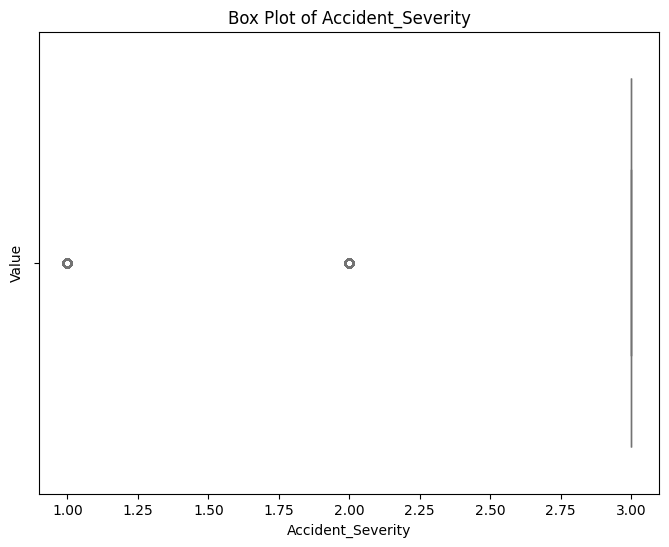

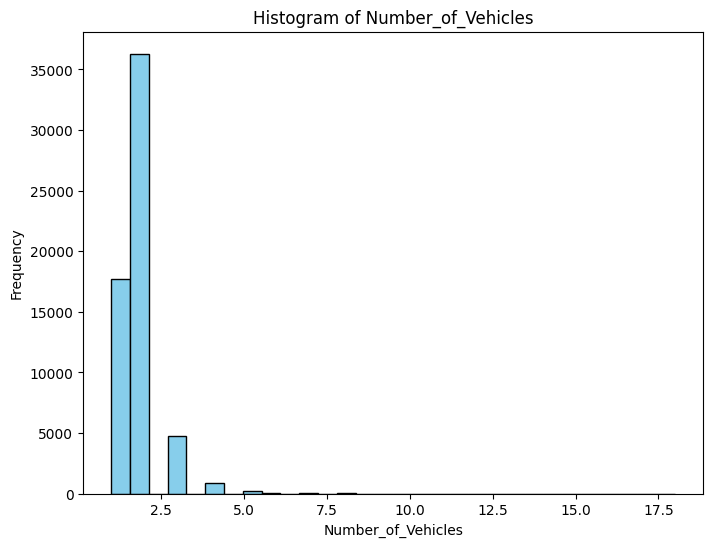

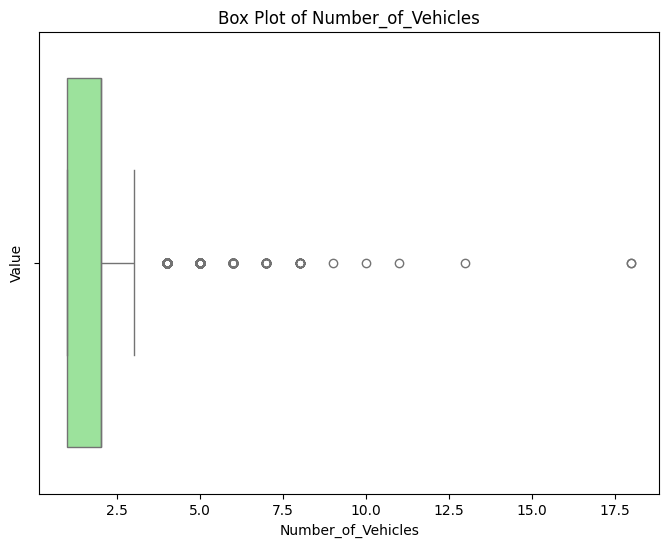

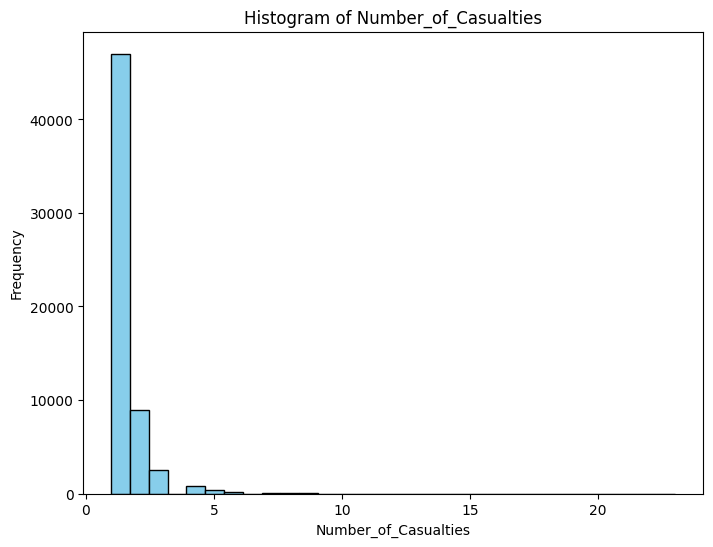

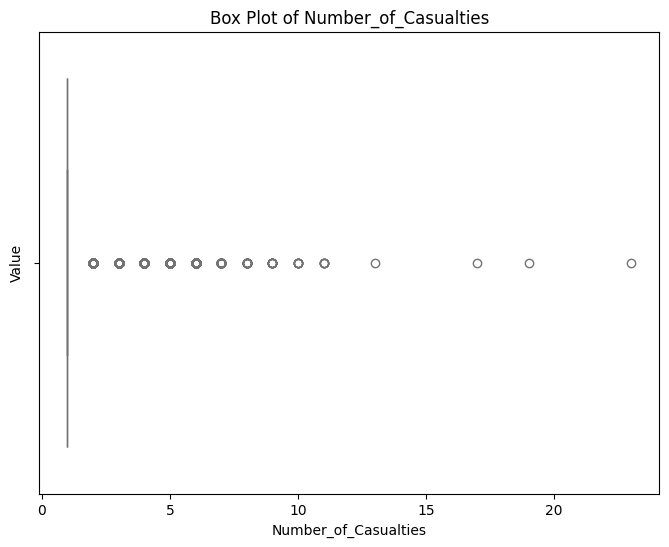

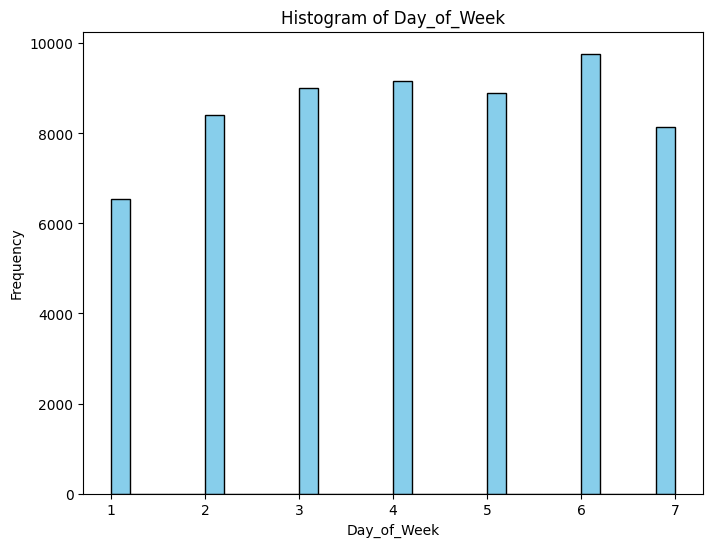

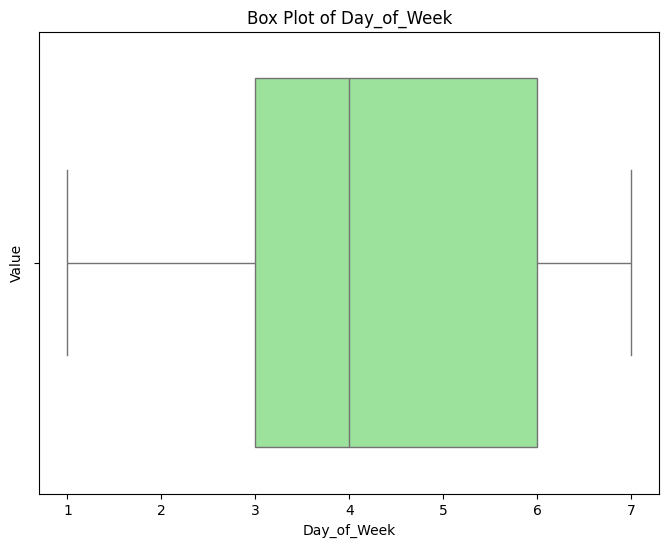

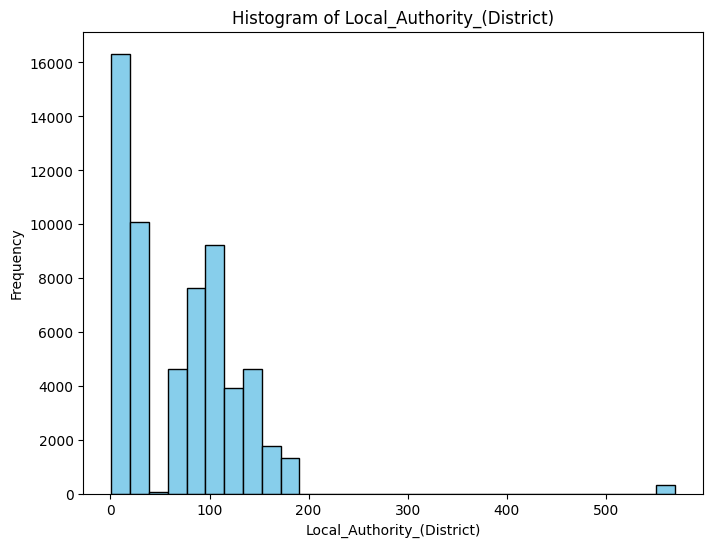

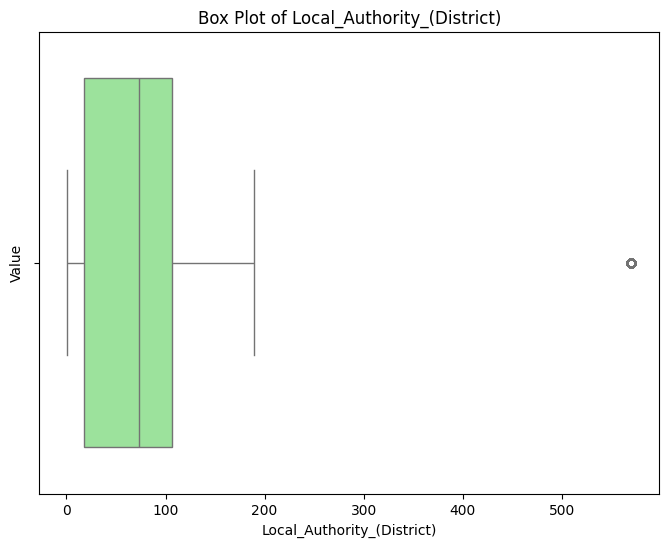

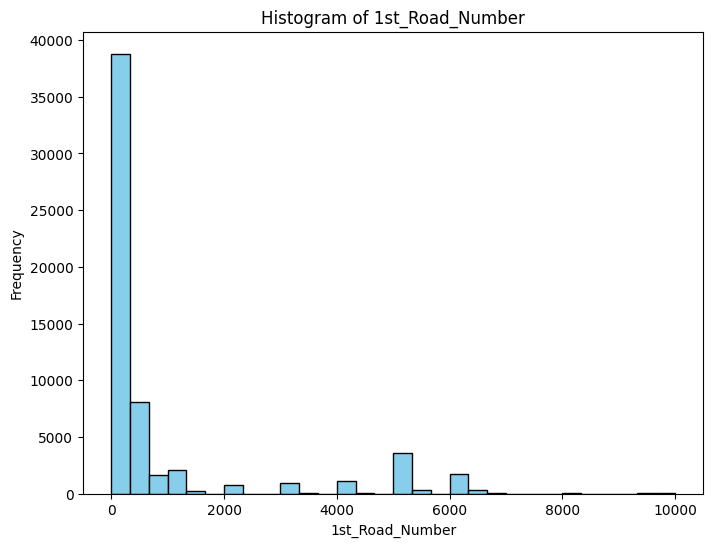

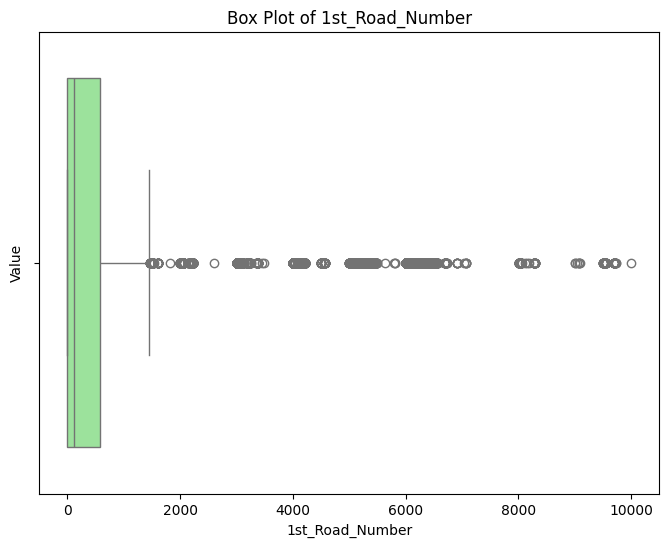

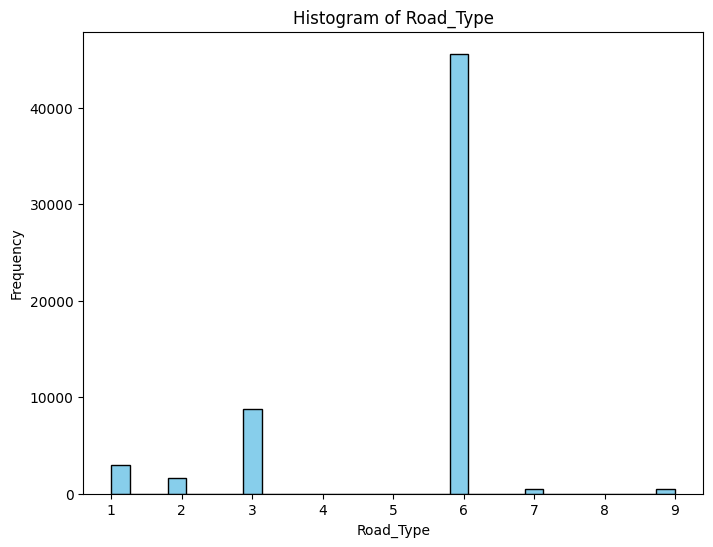

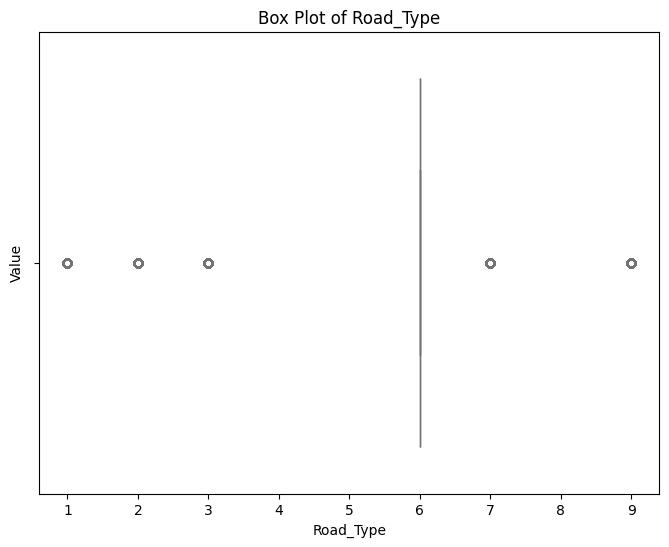

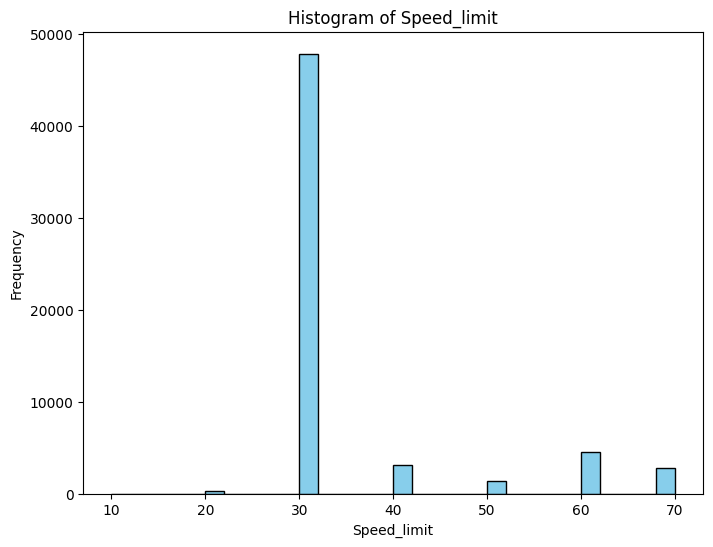

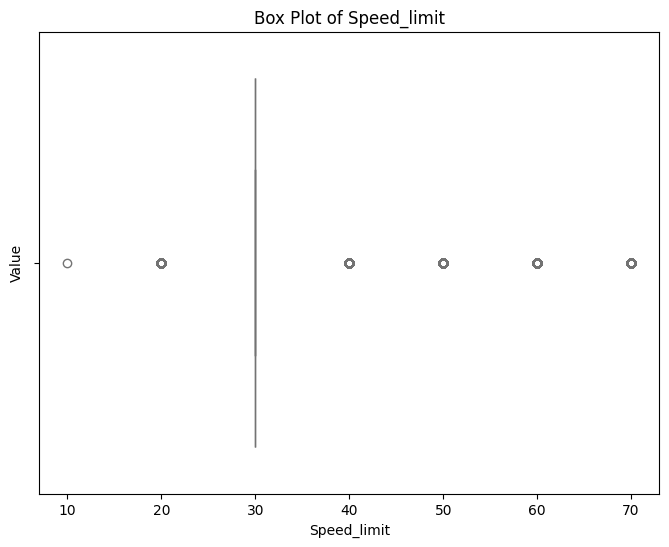

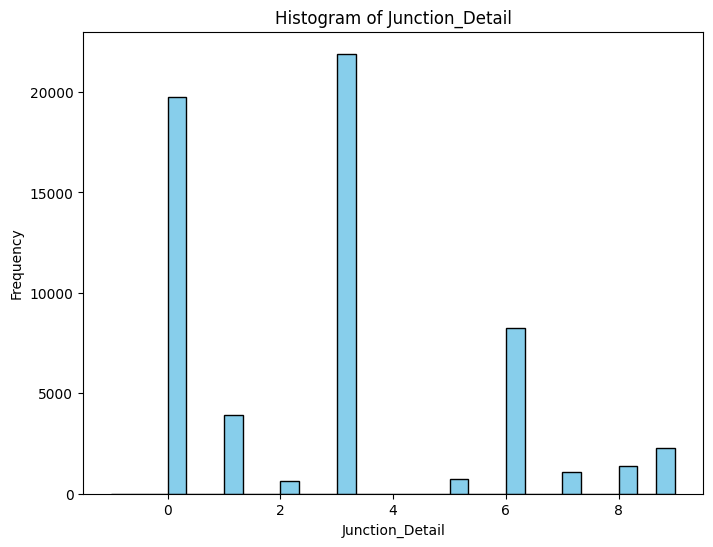

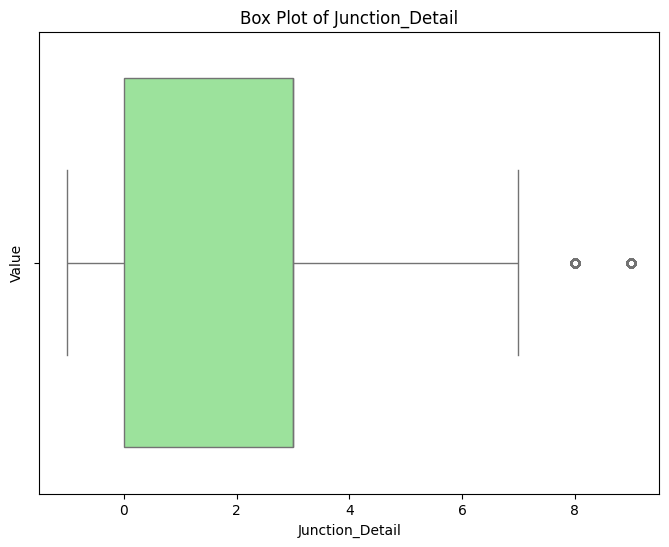

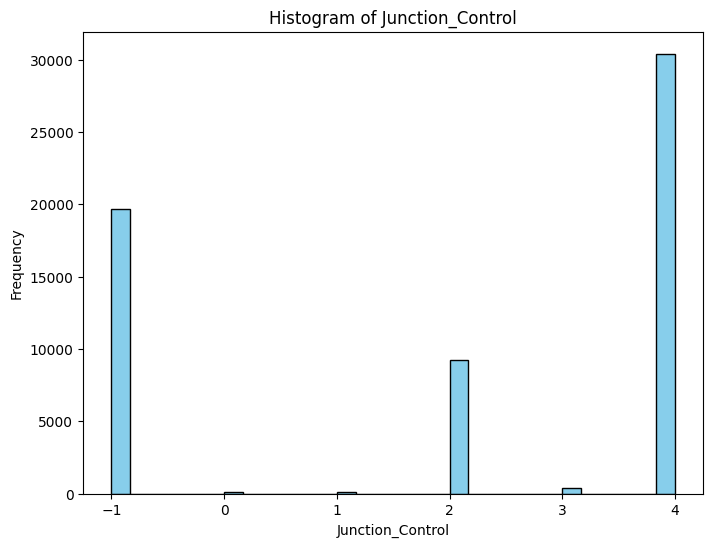

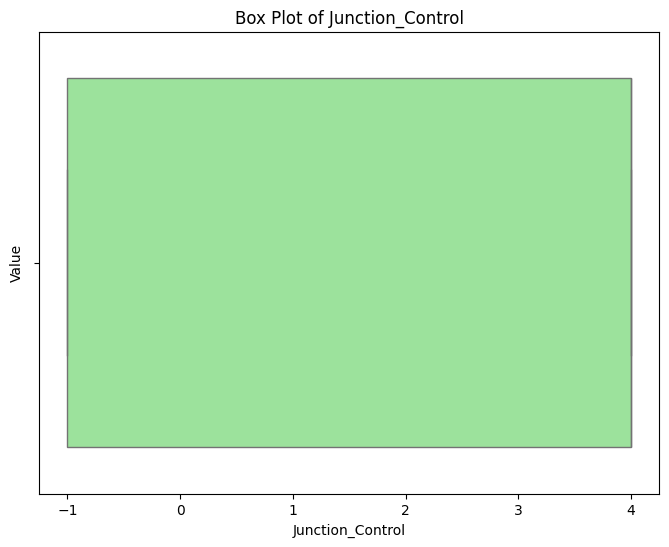

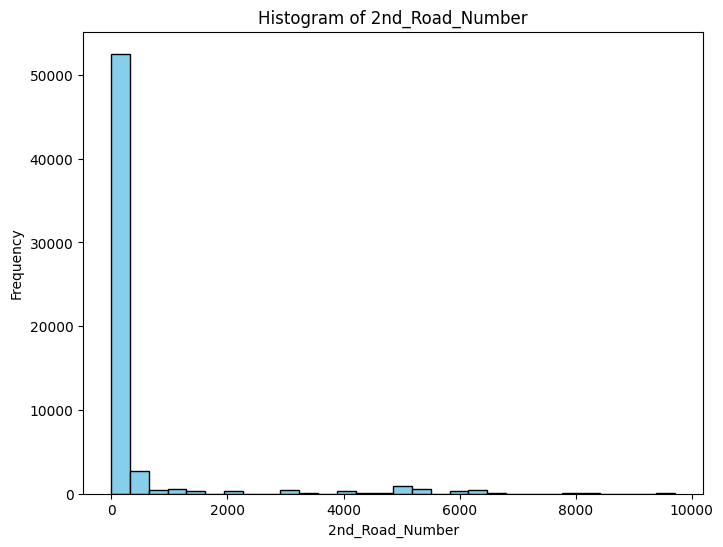

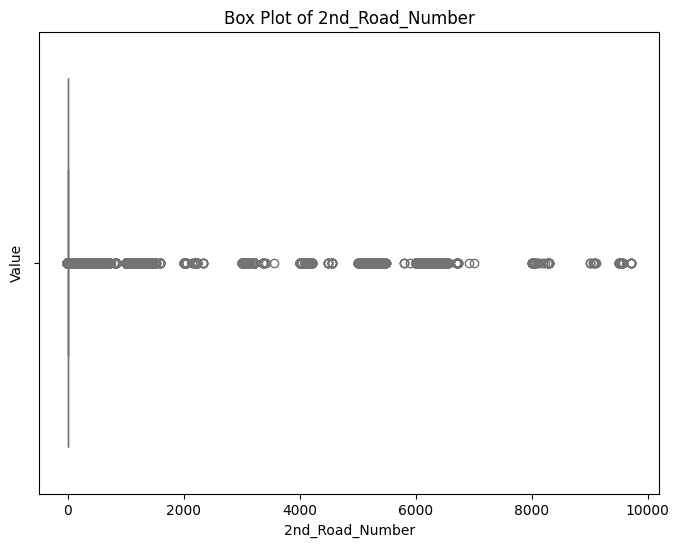

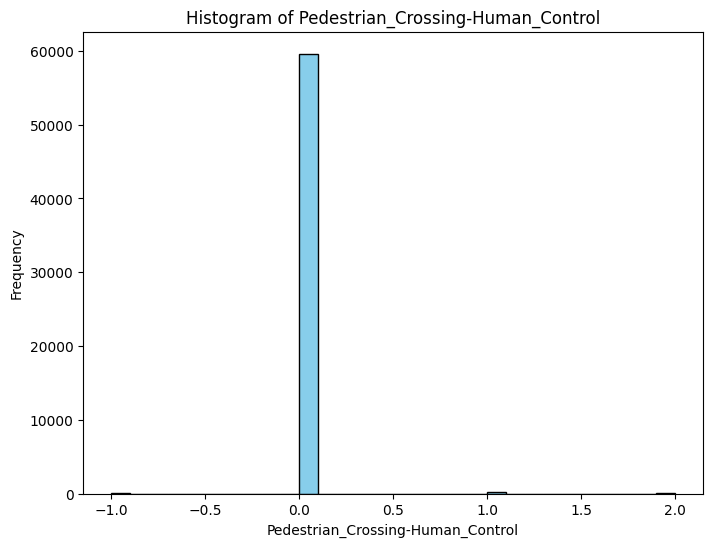

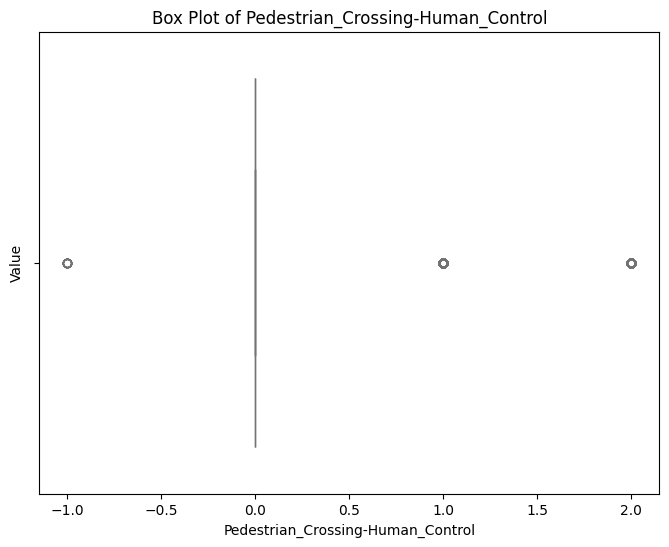

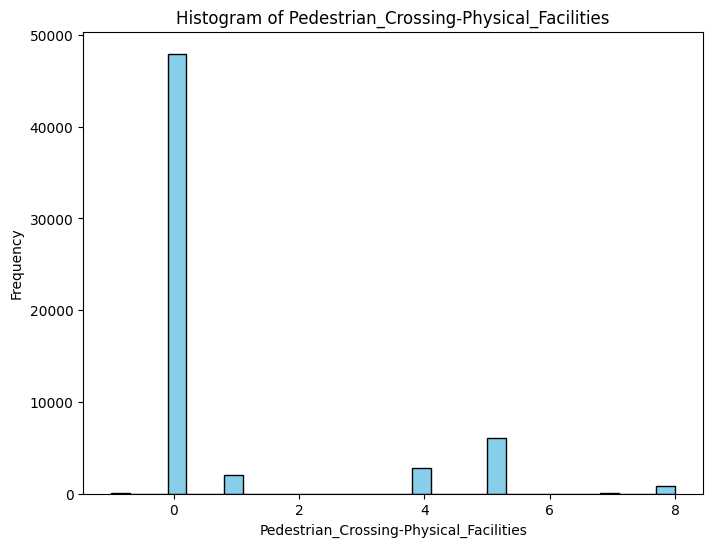

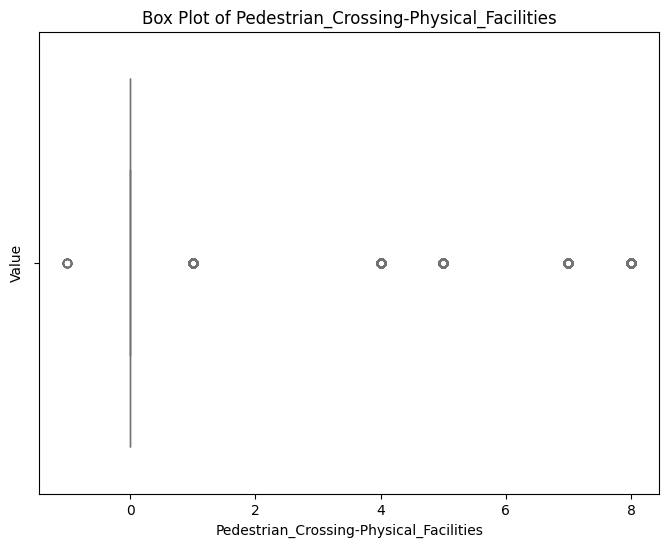

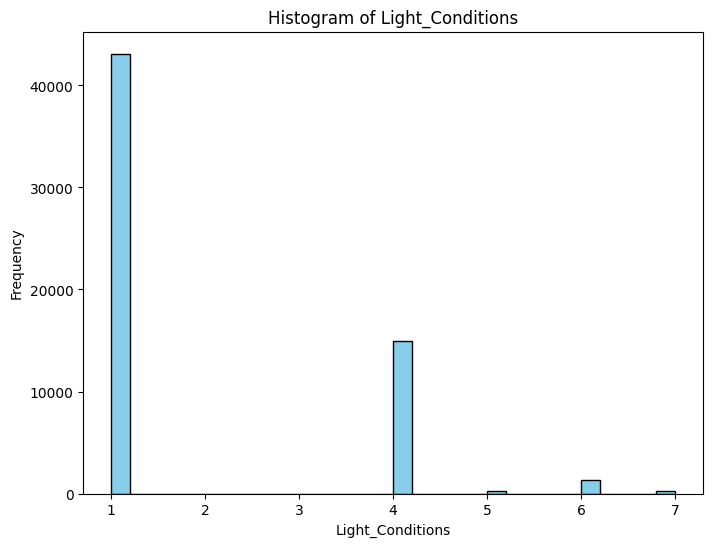

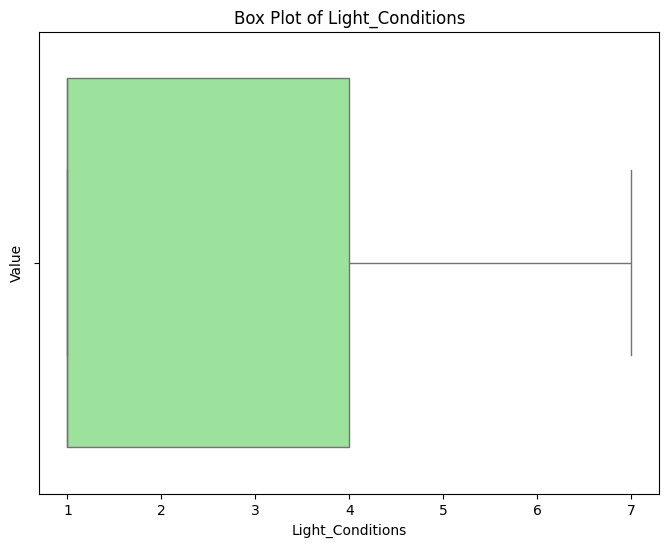

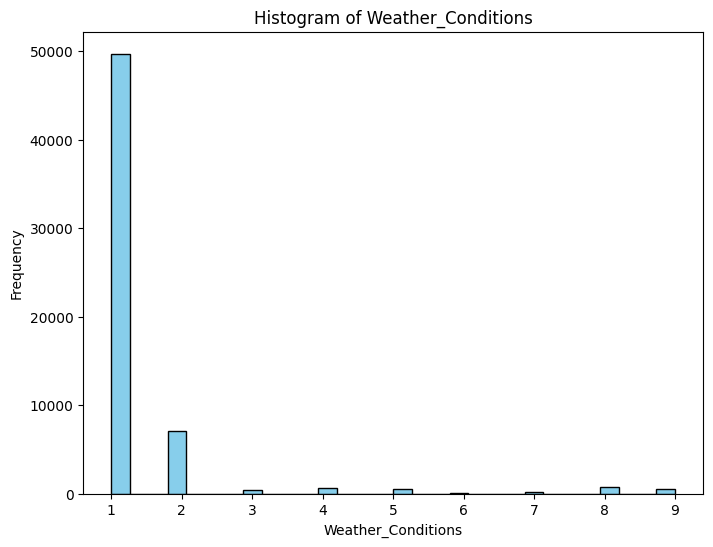

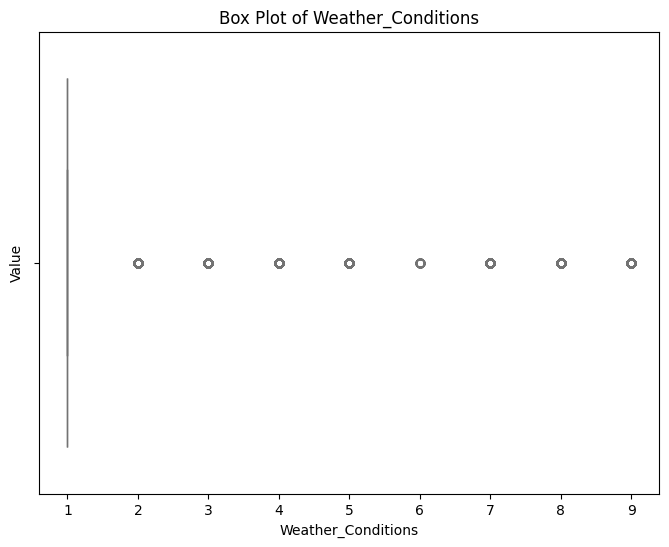

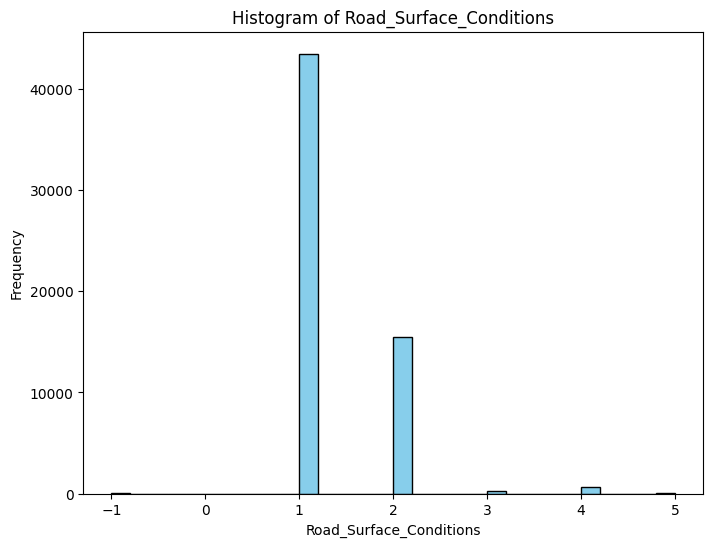

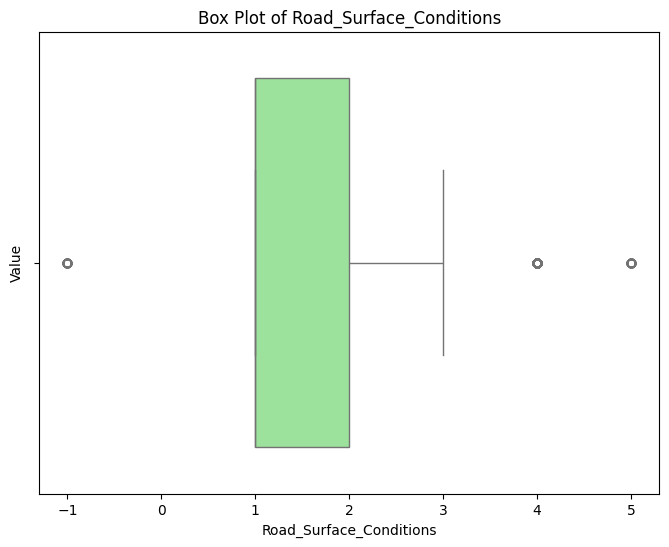

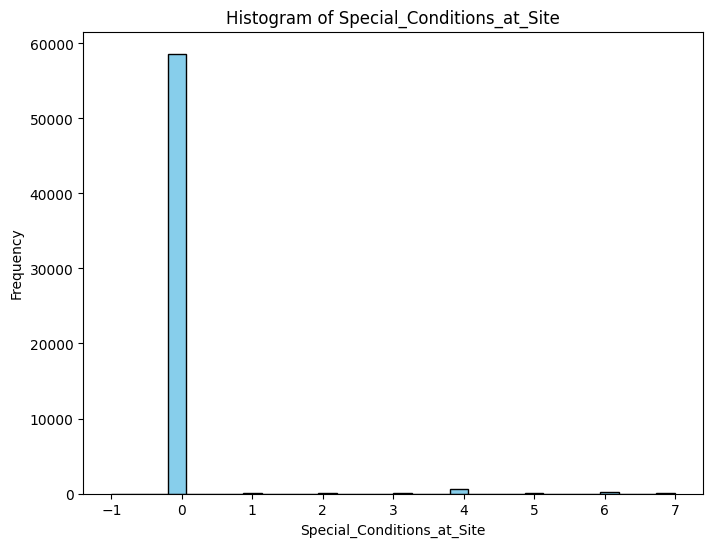

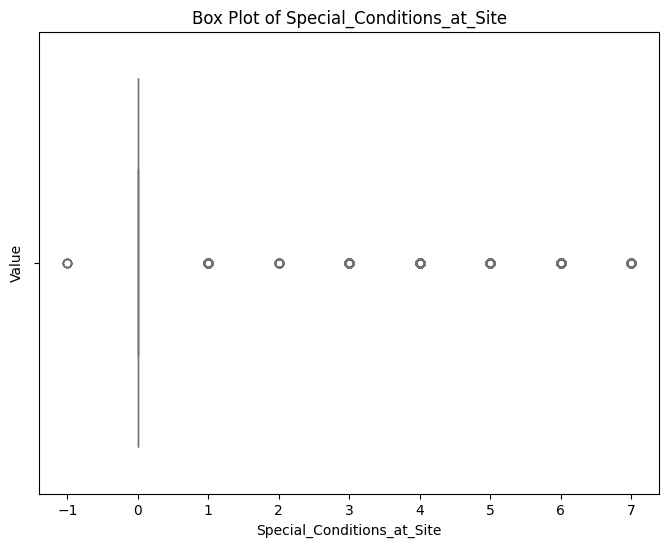

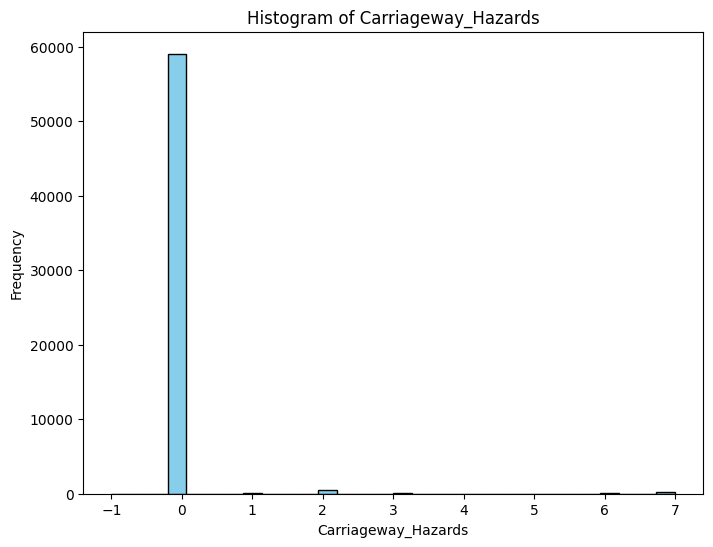

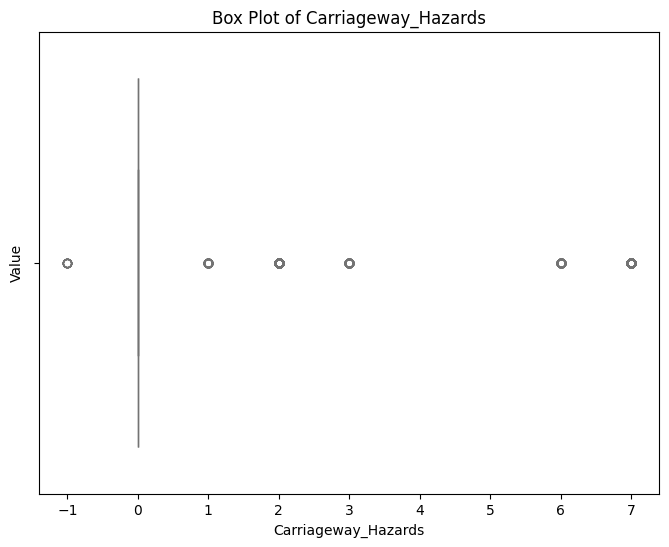

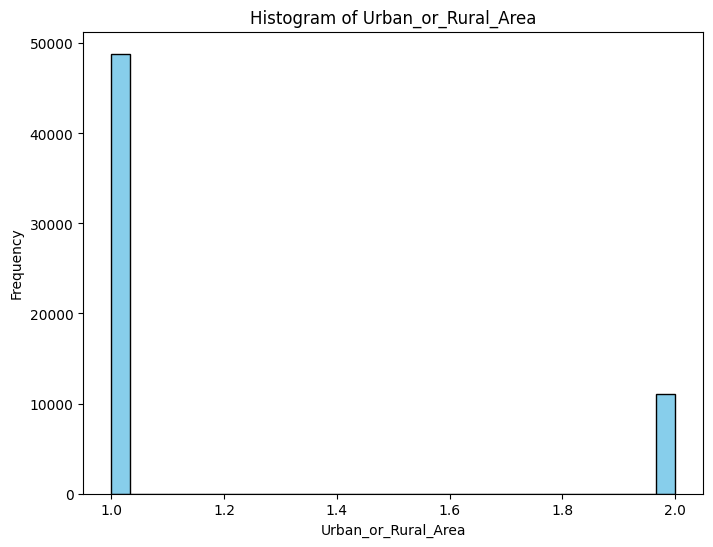

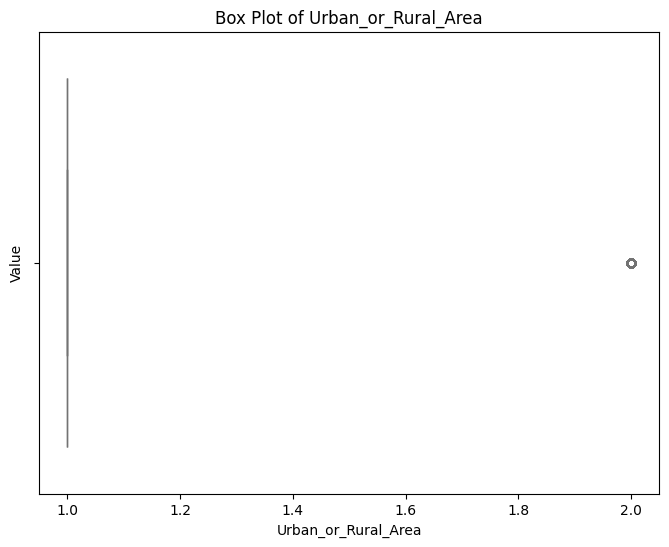

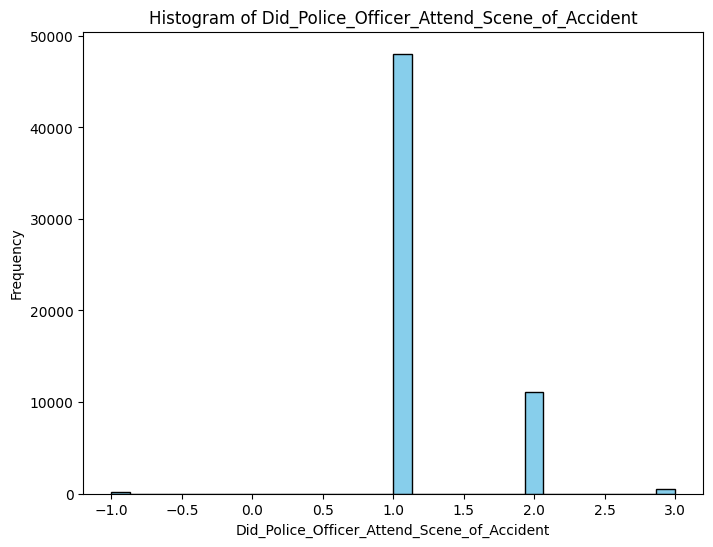

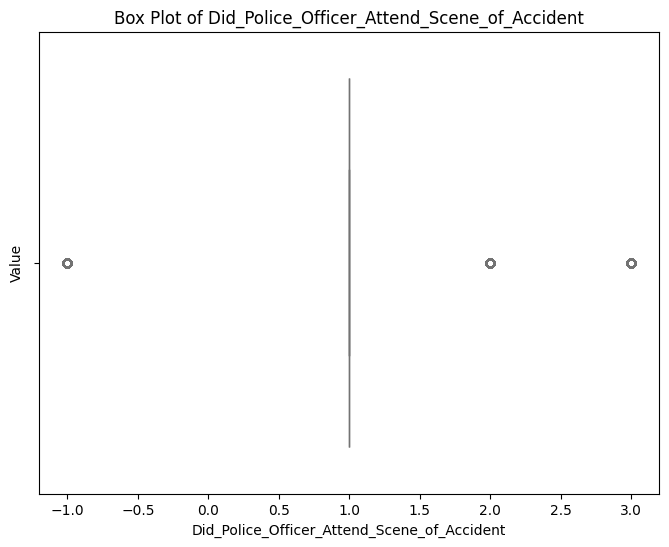

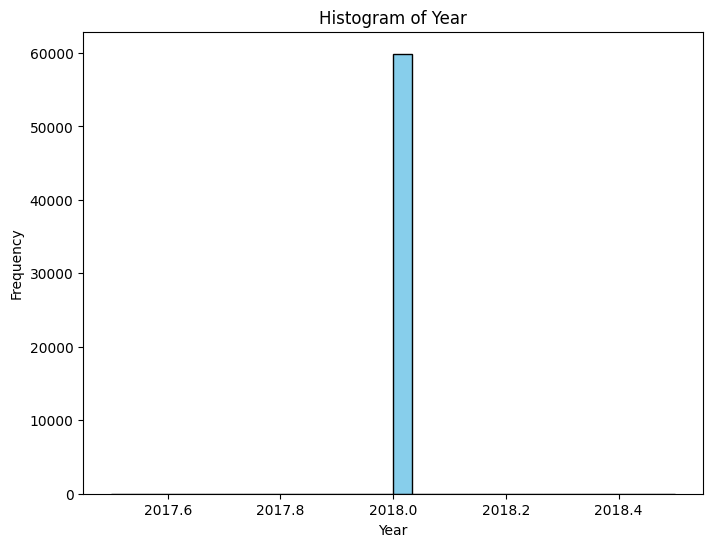

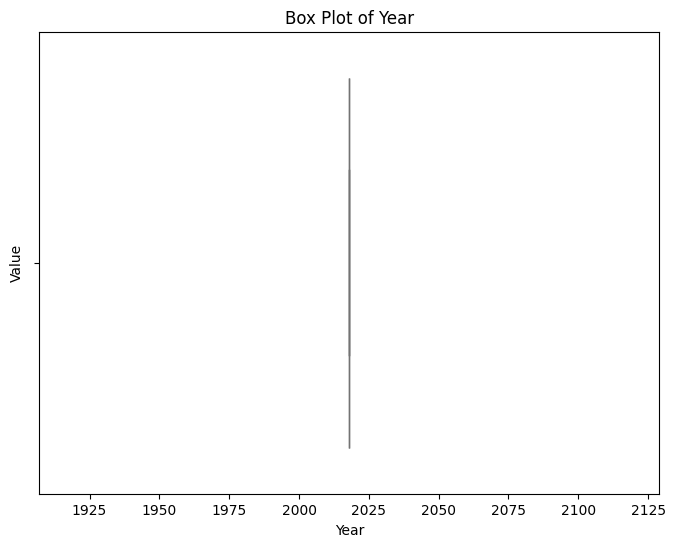

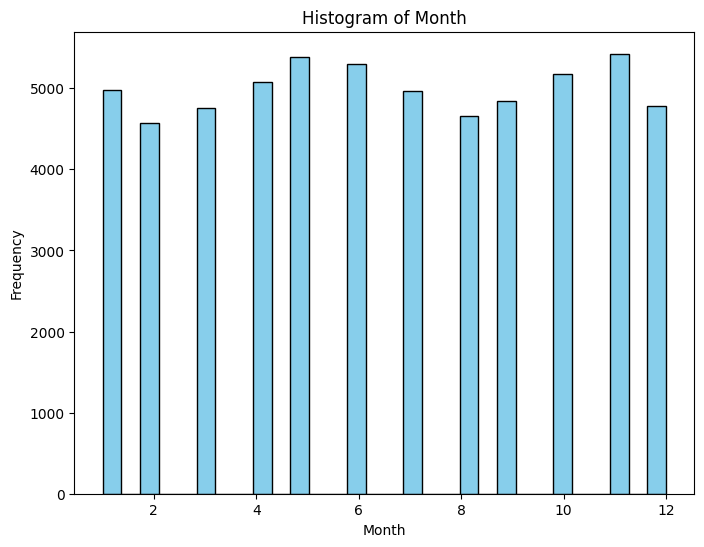

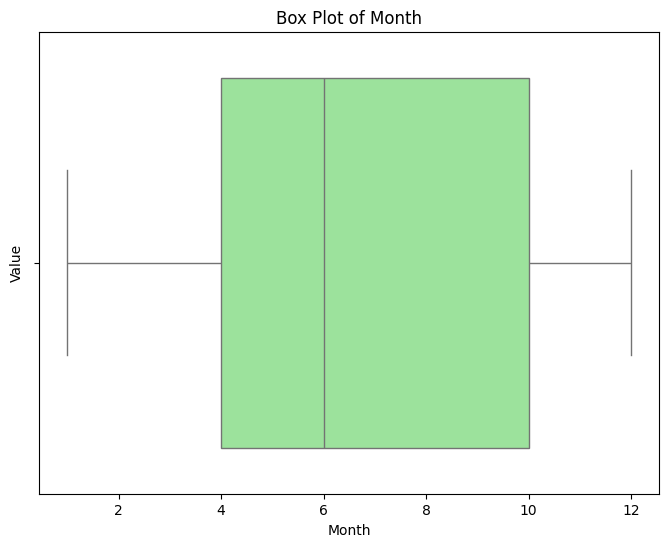

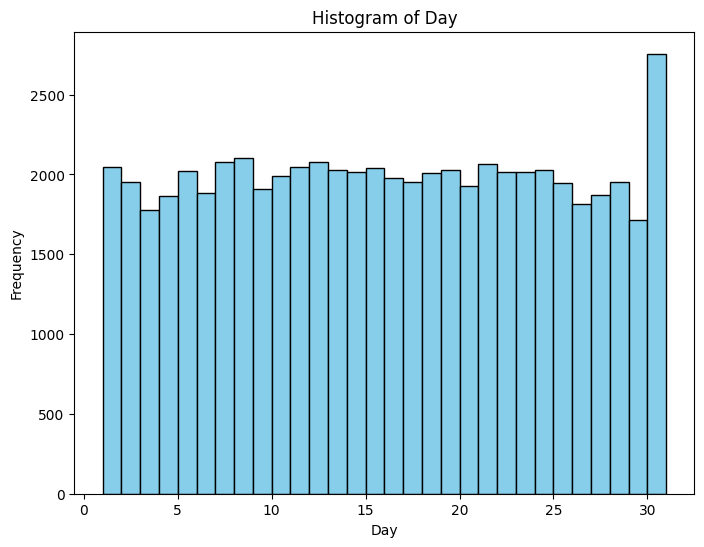

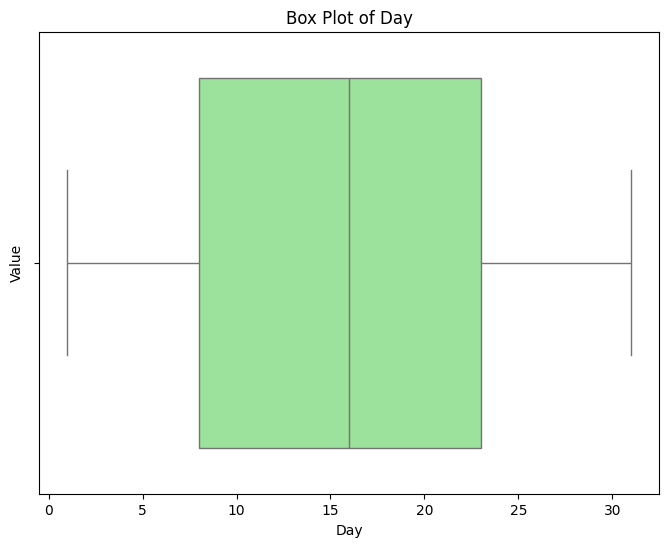

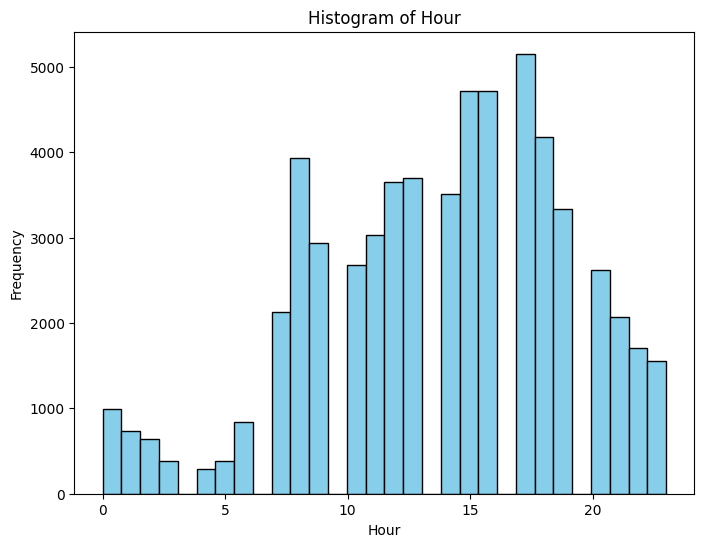

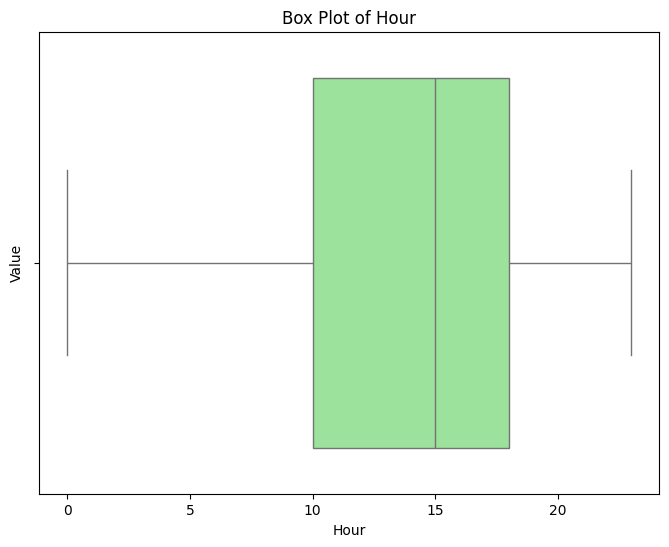

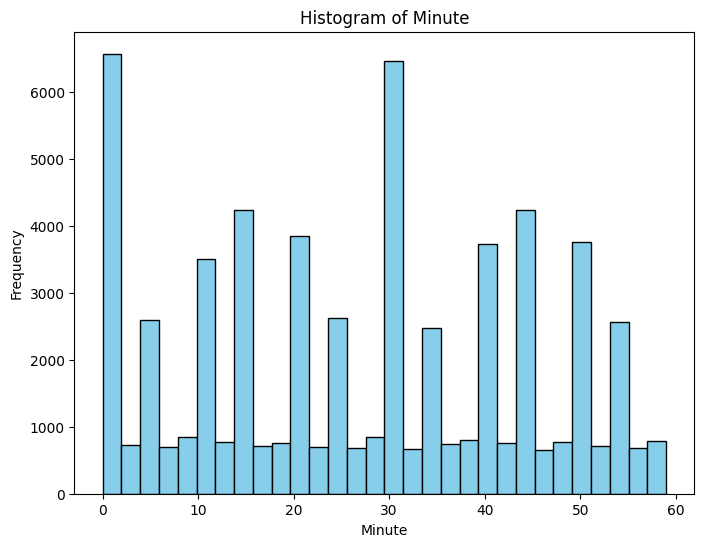

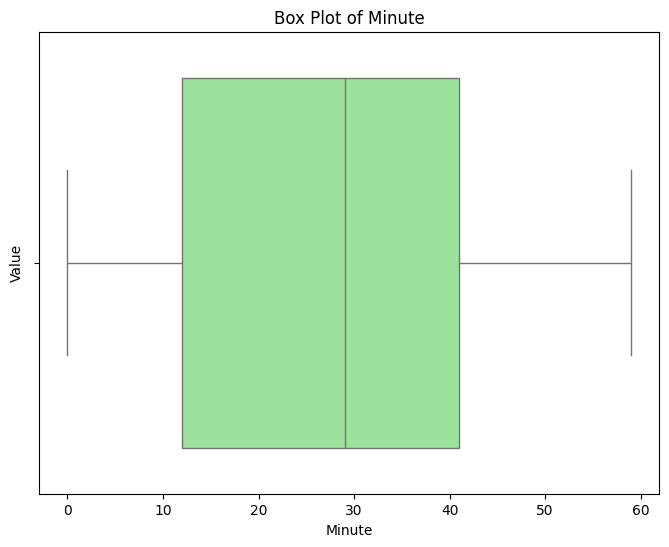

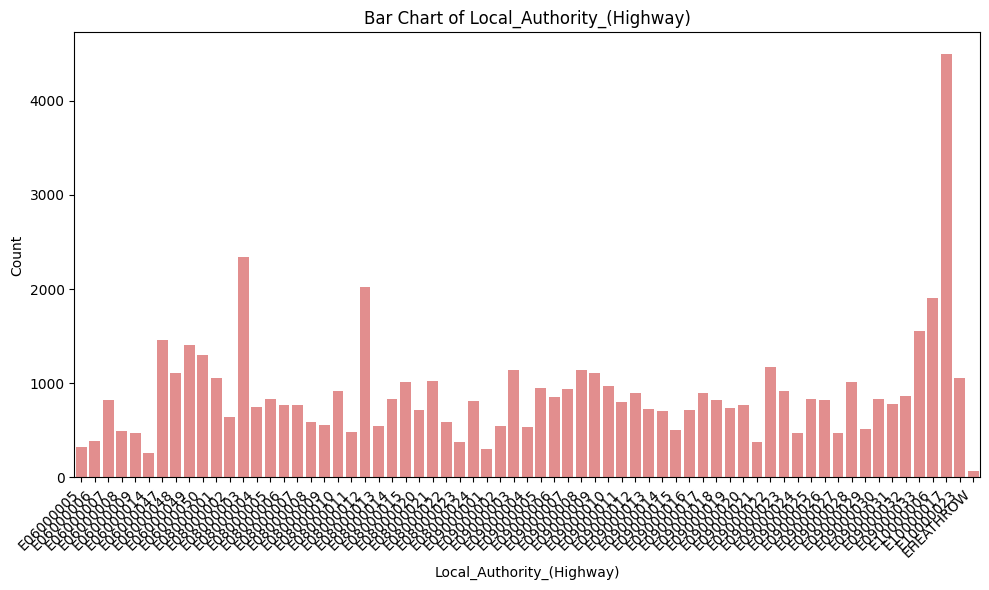

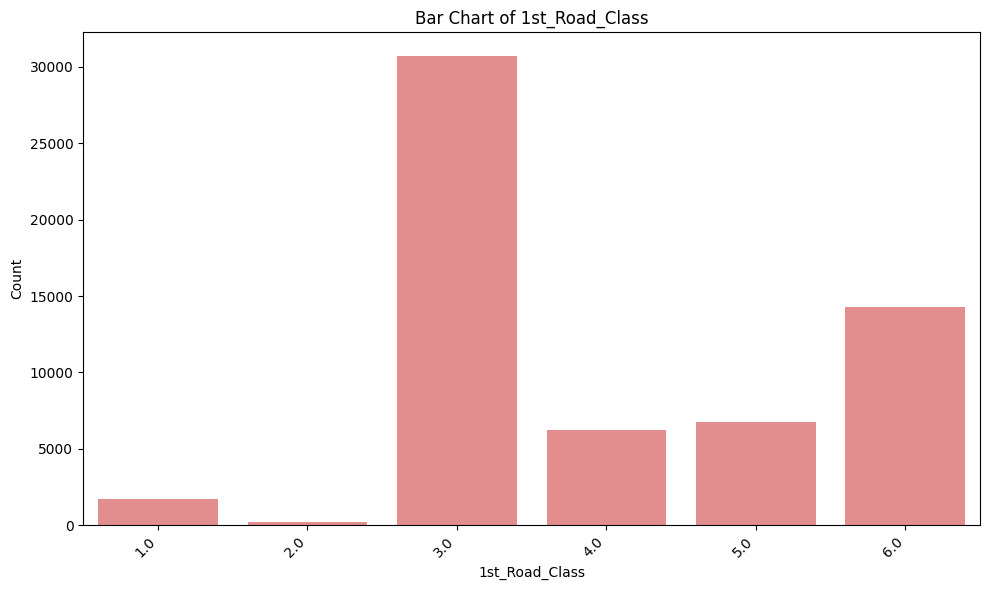

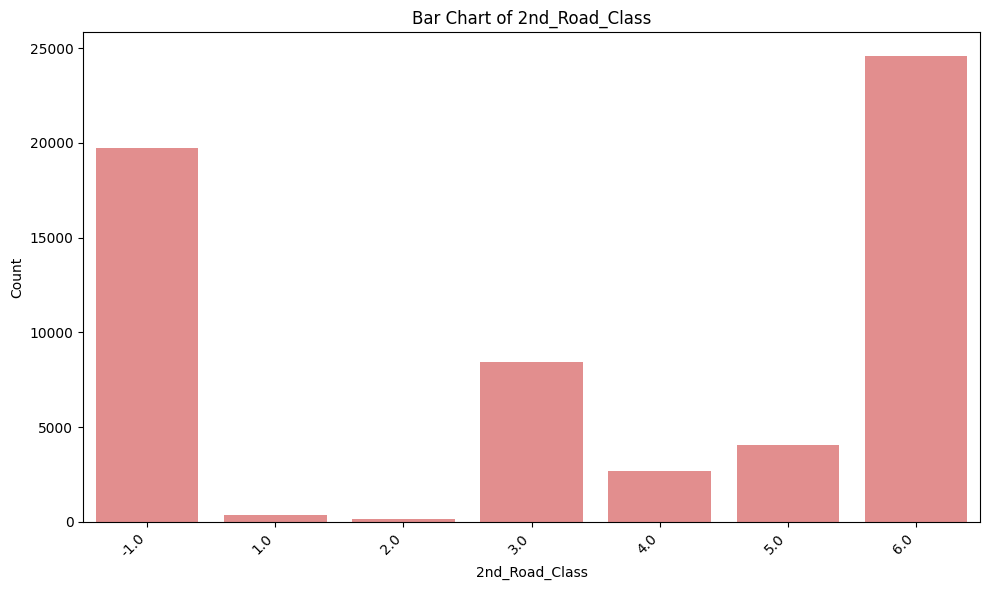

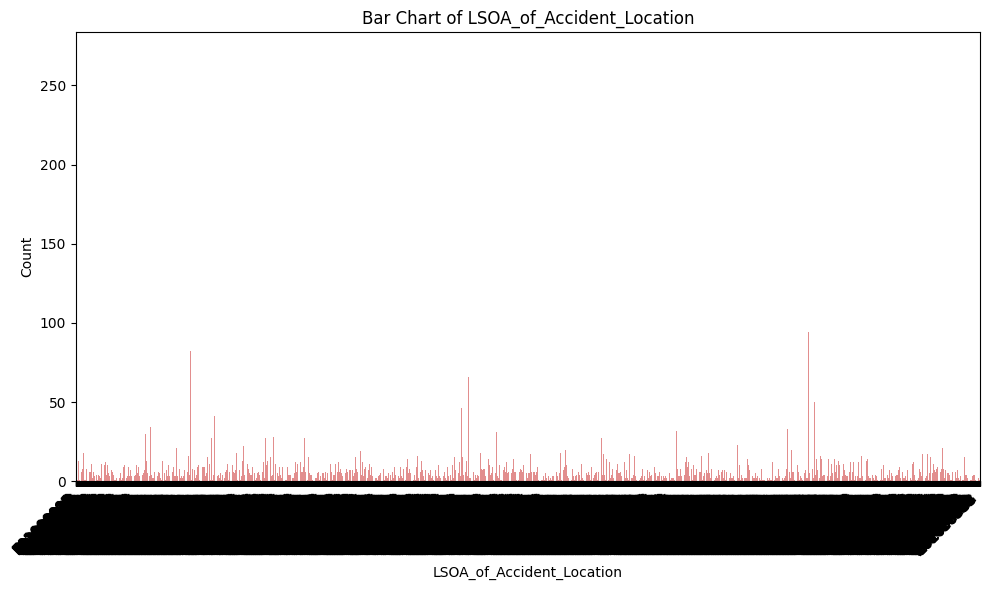

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical and categorical columns
numerical_cols = df_prepared.select_dtypes(include=['number']).columns
categorical_cols = df_prepared.select_dtypes(include=['category']).columns

# Visualize numerical columns
for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df_prepared[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_prepared[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

# Visualize categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_prepared[col], color='lightcoral')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Data analysis

### Subtask:
Perform multivariate analysis on the `df_prepared` DataFrame to explore relationships between different variables.


**Reasoning**:
The current subtask is to perform multivariate analysis on the `df_prepared` DataFrame. The first step is to calculate the correlation matrix for all numerical variables. Then we need to print the correlation matrix and interpret the most significant correlations. All these steps can be done in one code block.



Correlation Matrix:
                                              Accident_Index  longitude  \
Accident_Index                                     1.000000  -0.625462   
longitude                                         -0.625462   1.000000   
latitude                                          -0.044050   0.362402   
Police_Force                                       0.592444  -0.329611   
Accident_Severity                                 -0.025228   0.052550   
Number_of_Vehicles                                 0.048308  -0.030918   
Number_of_Casualties                               0.134294  -0.086745   
Day_of_Week                                        0.008469  -0.012033   
Local_Authority_(District)                         0.727826  -0.430265   
1st_Road_Number                                    0.152412  -0.113264   
Road_Type                                         -0.028960   0.023908   
Speed_limit                                        0.314497  -0.183458   
Junction_Detail  

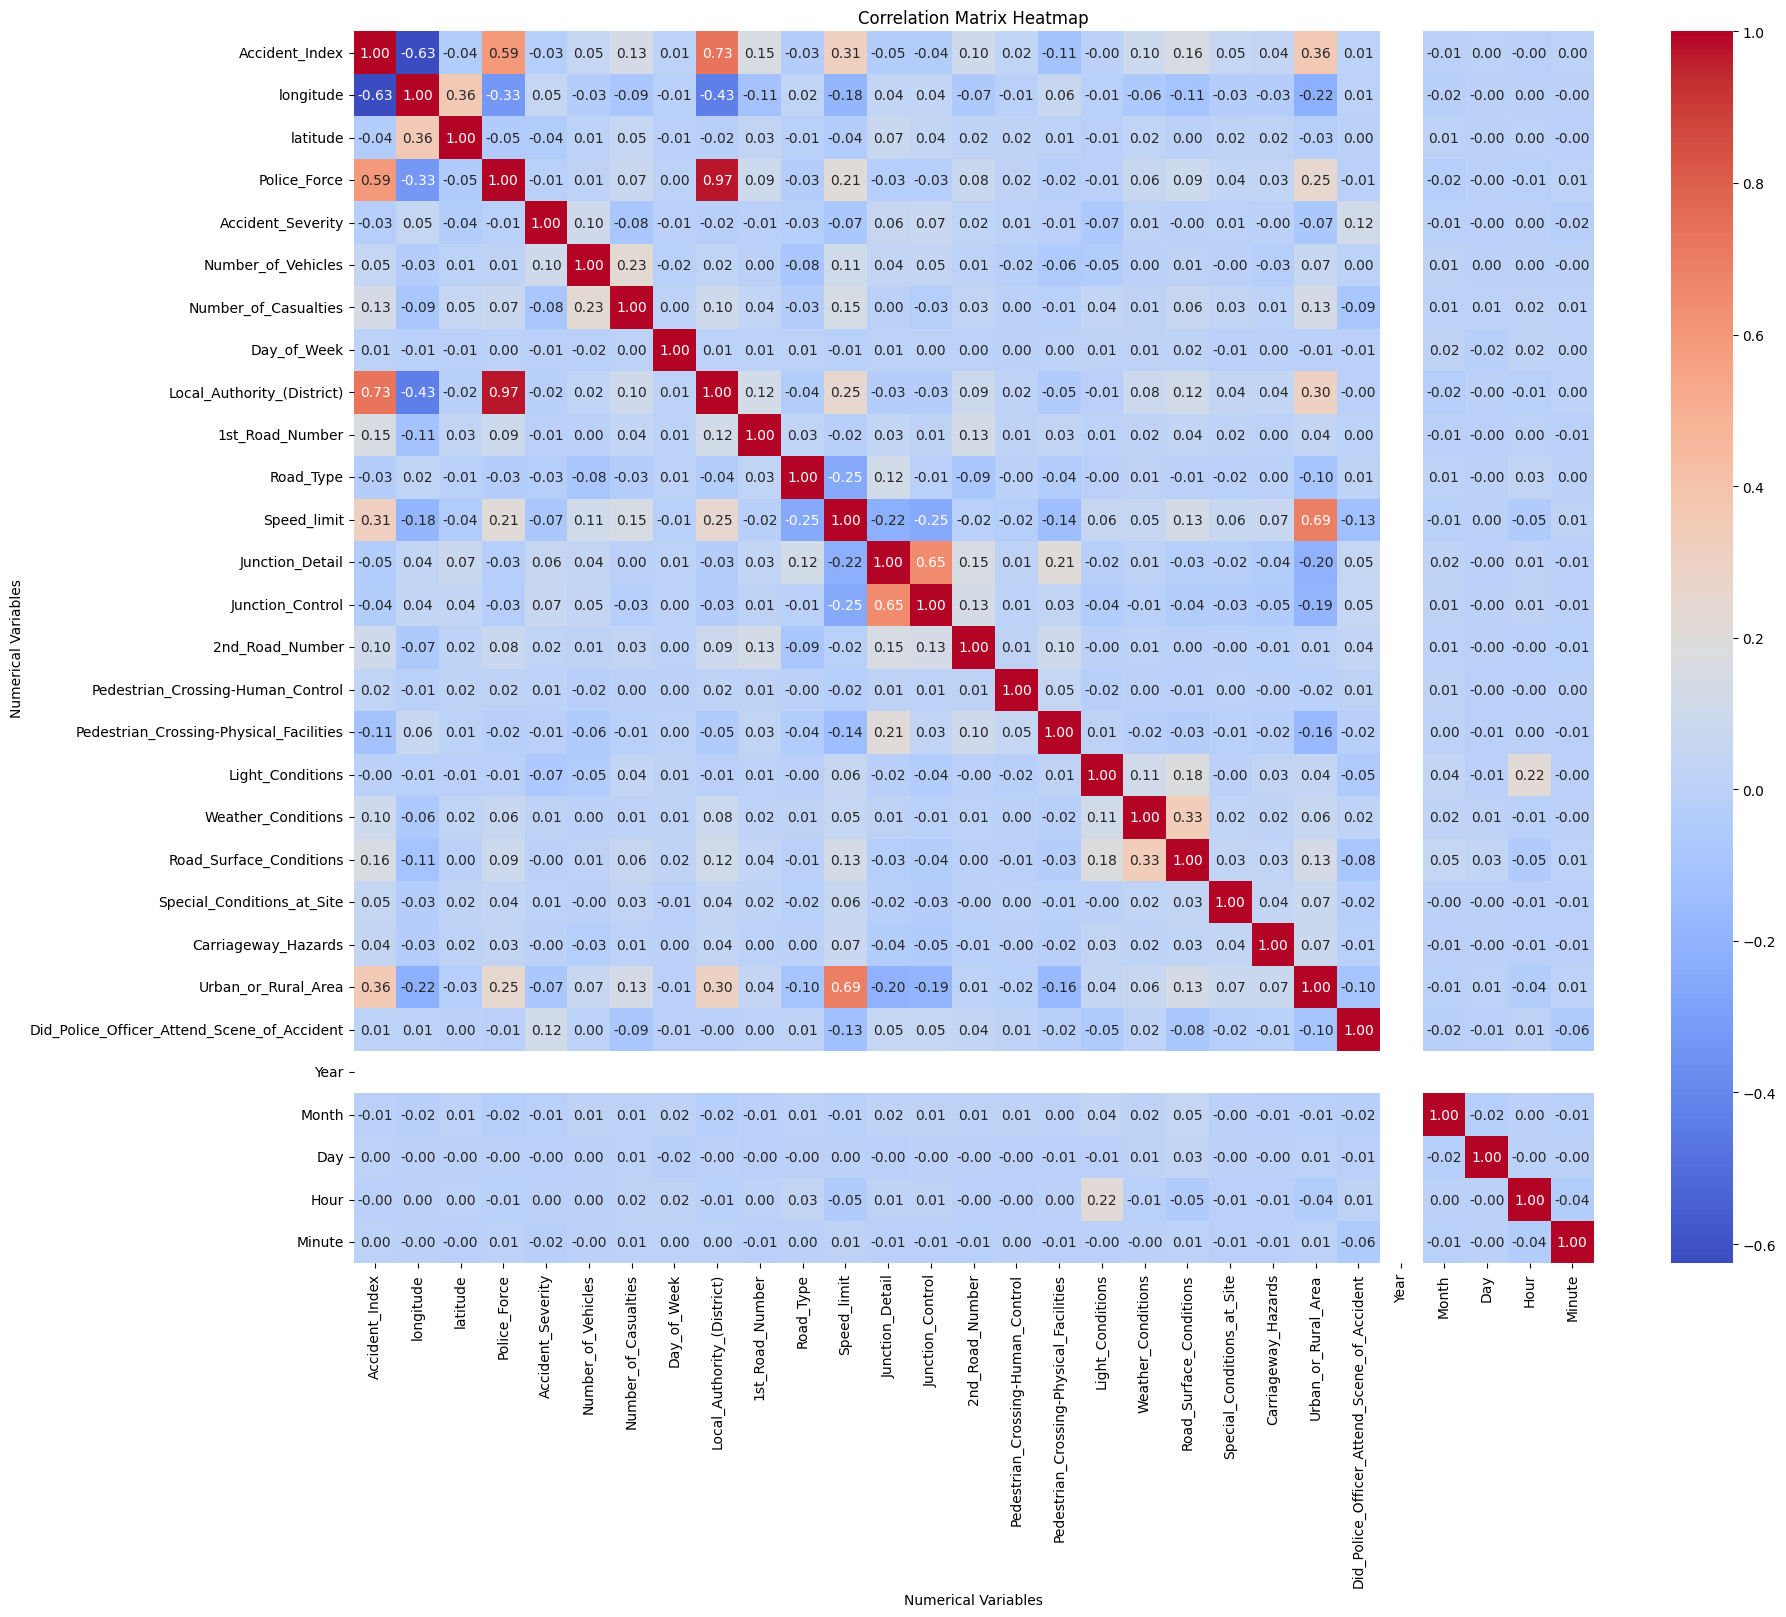

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical variables
numerical_cols = df_prepared.select_dtypes(include=['number']).columns
correlation_matrix = df_prepared[numerical_cols].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Interpret significant correlations
print("\nSignificant Positive Correlations (greater than 0.5):")
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.5:
            print(f"  {col1} and {col2}: {correlation_matrix.loc[col1, col2]:.2f}")

print("\nSignificant Negative Correlations (less than -0.5):")
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2 and correlation_matrix.loc[col1, col2] < -0.5:
            print(f"  {col1} and {col2}: {correlation_matrix.loc[col1, col2]:.2f}")

# Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Numerical Variables")
plt.ylabel("Numerical Variables")
plt.show()

**Reasoning**:
The previous command completed the first three steps of the instructions. The next steps are to select two categorical features, create a cross-tabulation, print it, and visualize it with a grouped bar chart. I'll use 'Accident_Severity' and 'Urban_or_Rural_Area' as the two categorical variables. These steps can be done in one code block.




Cross-tabulation of Accident Severity and Urban or Rural Area:
 Urban_or_Rural_Area    1.0   2.0
Accident_Severity               
1.0                    381   264
2.0                   5649  1715
3.0                  42822  9069


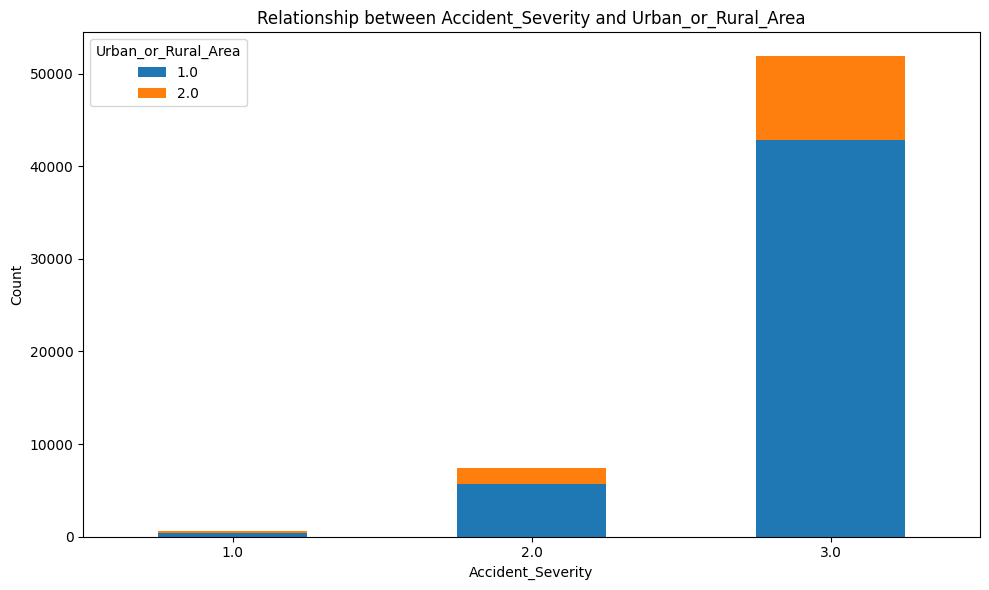

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Select two categorical features
categorical_feature_1 = 'Accident_Severity'
categorical_feature_2 = 'Urban_or_Rural_Area'

# Create a cross-tabulation
cross_tab = pd.crosstab(df_prepared[categorical_feature_1], df_prepared[categorical_feature_2])

# Print the cross-tabulation
print("\nCross-tabulation of Accident Severity and Urban or Rural Area:\n", cross_tab)

# Create a grouped bar chart
cross_tab.plot.bar(stacked=True, figsize=(10, 6))
plt.title(f'Relationship between {categorical_feature_1} and {categorical_feature_2}')
plt.xlabel(categorical_feature_1)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title=categorical_feature_2)
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

*   **What is the shape of the initial dataset?**
    The initial dataset "AccidentsBig.csv" has 1,048,575 rows and 30 columns.
*   **What was the problem in the first data cleaning step?**
    In the first data cleaning step, all columns were dropped because they had more than 50% missing values, leaving an empty DataFrame.
*   **How was the data cleaning approach modified after the initial failure?**
    The threshold for dropping columns was changed from 50% to 95% missing values. Additionally, missing numerical values were imputed using the median, and only rows with any remaining missing values were dropped.
*   **What are the data types of the columns after data wrangling?**
    After data wrangling, there are 4 categorical columns with 'category' type, and 29 numerical columns with 'float32' type.
*   **What's the shape of the dataframe after all the cleaning?**
    The final cleaned DataFrame has 59900 rows and 33 columns.
*   **What is the time range of accidents in the dataset?**
    The accidents in the dataset occurred throughout the year 2018.
* **What's the most frequent accident time?**
 The most frequent time for accidents is 15:30, with 569 accidents.
*   **What are the significant correlations found in the multivariate analysis?**
    *   Strong positive correlations were observed between 'Police_Force' and 'Local_Authority_(District)' (0.97).
    *   A strong negative correlation was found between 'Accident_Index' and 'longitude' (-0.63).
* **What are the categorical features used in the cross-tabulation?**
    The 'Accident_Severity' and 'Urban_or_Rural_Area' were the two categorical features used.

### 2. Data Analysis Key Findings

*   **Data Cleaning:**
    *   The initial dataset had a significant amount of missing data, with most columns having over 94% missing values.
    *   By raising the threshold to 95% for dropping columns, no columns were removed.
    *   After cleaning, the dataset was reduced to 59900 rows and 33 columns, with no missing values remaining.
*   **Data Exploration:**
    *   The dataset contains 59,900 unique accidents, each with a unique 'Accident_Index'.
    *   The average number of vehicles involved in accidents is 1.83, and the average number of casualties is 1.32.
    * The most frequent time for accidents is 15:30, with 569 accidents.
    *   The most frequent value of `Accident_Severity` is 3.
    * The accidents happened throughout the year 2018.
*   **Univariate Analysis:**
    *   The mean accident severity is 2.86, indicating that most accidents are of severity level 3.
    *   The average longitude of accidents is 78.10, and the average latitude is 22.08.
    *   The 'Local_Authority_(Highway)' column shows 'E10000017' as the most frequent area of accidents (4499).
    *   The most common '1st_Road_Class' is '3.0', with 30730 occurrences.
    * The most common '2nd_Road_Class' is '6.0' with 24612 occurrences.
*   **Multivariate Analysis:**
    *   'Police_Force' and 'Local_Authority_(District)' have a strong positive correlation (0.97).
    *   'Accident_Index' and 'longitude' have a strong negative correlation (-0.63).
    * The cross-tabulation between 'Accident_Severity' and 'Urban_or_Rural_Area' reveals the distribution of accident severities across urban and rural areas.

### 3. Insights or Next Steps

*   **Focus on High-Risk Areas:** Given that 'E10000017' is the most frequent area for accidents, a deeper dive into the characteristics of this area could help in understanding the causes of accidents.
*   **Investigate Negative Correlation:** The negative correlation between 'Accident_Index' and 'longitude' (-0.63) suggests a geographical pattern. Mapping the accidents geographically could provide further insights.
